In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import scipy.fft
from scipy import stats
from scipy.stats import norm
import pickle
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn.linear_model import BayesianRidge
from sklearn.inspection import permutation_importance, plot_partial_dependence
from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression

In [58]:
def graf_car(y_p_car, y_car_pip, s):
    car = pd.DataFrame(data=y_p_car, columns=['y_predicted'])
    df_car = pd.DataFrame(data=y_car_pip, columns=['y_true'])
    df_car = pd.concat([car,df_car], axis=1)

    
    title = "CAR "+s+" label/prediction"
    plt.title(title)
    sns.scatterplot(data=df_car,x='y_predicted', y='y_true')
    plt.show()
    

In [59]:
def graf_camion(y_p_camion, y_camion_pip, s):

    camion = pd.DataFrame(data=y_p_camion, columns=['y_predicted'])
    df_camion = pd.DataFrame(data=y_camion_pip, columns=['y_true'])
    df_camion = pd.concat([camion,df_camion], axis=1)

    
    title = "CAMION "+s+" label/prediction"
    plt.title(title)
    sns.scatterplot(data=df_camion,x='y_predicted', y='y_true')
    plt.show()

In [50]:
d = pd.read_pickle('day_time_60.pkl')
df_60 = pd.DataFrame(d)
print(df_60.columns)

d = pd.read_pickle('mean_f_60.pkl')
mean_f_60 = pd.DataFrame(d)
print(mean_f_60)

d = pd.read_pickle('median_f_60.pkl')
median_f_60 = pd.DataFrame(d)
#print(mean_f)

d = pd.read_pickle('std_f_60.pkl')
std_f_60 = pd.DataFrame(d)

#d = pd.read_pickle('fft_mean_f.pkl')
#fft_mean_f = pd.DataFrame(d)
#print(fft_mean_f)

d = pd.read_pickle('max_abs_60.pkl')
max_abs_60 = pd.DataFrame(d)

d = pd.read_pickle('max_60.pkl')
max_60 = pd.DataFrame(d)

d = pd.read_pickle('min_60.pkl')
min_60 = pd.DataFrame(d)

d = pd.read_pickle('kurtuisi_60.pkl')
kurtuisi_60 = pd.DataFrame(d)

d = pd.read_pickle('skew_60.pkl')
skew_60 = pd.DataFrame(d)

d = pd.read_pickle('abs_values_sum_60.pkl')
abs_values_sum_60 = pd.DataFrame(d)

d = pd.read_pickle('abs_energy_60.pkl')
abs_energy_60 = pd.DataFrame(d)

d = pd.read_pickle('median_abs_deviation_60.pkl')
median_abs_deviation_60 = pd.DataFrame(d)

d = pd.read_pickle('elem_over_mean_60.pkl')
elem_over_mean_60 = pd.DataFrame(d)

d = pd.read_pickle('root_mean_square_60.pkl')
root_mean_square_60 = pd.DataFrame(d)

Index(['t', 'x10D41', 'y10D41', 'z10D41', 'x10D42', 'y10D42', 'z10D42',
       'x10D43', 'y10D43', 'z10D43', 'x10S40', 'y10S40', 'z10S40', 'x10S41',
       'y10S41', 'z10S41', 'x10S42', 'y10S42', 'z10S42', 'x10S43', 'y10S43',
       'z10S43', 'rilevazione', 'y_car', 'y_camion'],
      dtype='object')
    x10D41_mean_f  y10D41_mean_f  z10D41_mean_f  x10D42_mean_f  y10D42_mean_f  \
0        0.147556       0.974720       0.073677       0.020951       1.004244   
0        0.147563       0.974701       0.073679       0.020954       1.004267   
0        0.147569       0.974685       0.073679       0.020956       1.004293   
0        0.147573       0.974671       0.073681       0.020957       1.004319   
0        0.147574       0.974659       0.073681       0.020960       1.004351   
..            ...            ...            ...            ...            ...   
0        0.147580       0.974698       0.073676       0.020984       1.004287   
0        0.147579       0.974698       0.073675   

In [51]:
data_60 = pd.concat( [ median_abs_deviation_60, abs_values_sum_60, median_f_60, abs_energy_60, root_mean_square_60, std_f_60, max_60, min_60, kurtuisi_60, skew_60, mean_f_60, elem_over_mean_60], axis=1)
print(data_60)

   x10D41_median_abs_deviation y10D41_median_abs_deviation  \
0      [0.0002288853284504455]      [0.005951018539711583]   
0      [0.0002288853284504455]      [0.005569542992294174]   
0      [0.0002288853284504455]      [0.005493247882810692]   
0      [0.0002288853284504455]      [0.005340657663843729]   
0      [0.0002288853284504455]      [0.005188067444876765]   
..                         ...                         ...   
0     [0.00015259021896696368]     [0.0035858701457236464]   
0      [0.0002288853284504455]       [0.00373846036469061]   
0      [0.0002288853284504455]     [0.0039673456931410556]   
0      [0.0002288853284504455]      [0.004272526131074983]   
0      [0.0002288853284504455]       [0.00457770656900891]   

   z10D41_median_abs_deviation x10D42_median_abs_deviation  \
0       [0.002670328831921878]    [0.00022888532845044898]   
0      [0.0025177386129549006]    [0.00022888532845044898]   
0       [0.002365148393987951]    [0.00022888532845044898]   
0      

In [52]:
lista = ['y_car','y_camion']
y_c_60 = pd.DataFrame(df_60['y_car'][df_60['t']==0])
y_c_60.to_numpy()

y_cm_60 = pd.DataFrame(df_60['y_camion'][df_60['t']==0])
y_cm_60.to_numpy()

y_car_60 = np.array([y_c_60.max()])
y_camion_60 = np.array([y_cm_60.max()])
for t in range(1,891):   
    y_c_60=pd.DataFrame(df_60['y_car'][df_60['t']==t])
    y_c_60.to_numpy()
    y_car_60 = np.append(y_car_60,y_c_60.max())
    y_cm_60=pd.DataFrame(df_60['y_camion'][df_60['t']==t])
    y_cm_60.to_numpy()
    y_camion_60 = np.append(y_camion_60,y_cm_60.max())
print(y_car_60,y_camion_60)
X_60 = data_60
y_car_60 = pd.DataFrame(y_car_60)
y_camion_60 = pd.DataFrame(y_camion_60)
#y =pd.concat( [y_car, y_camion], axis=1)

#X_train_car_60, X_test_car_60, y_train_car_60, y_test_car_60 = train_test_split(X_60, y_car_60)
#X_train_camion_60, X_test_camion_60, y_train_camion_60, y_test_camion_60 = train_test_split(X_60, y_camion_60)

[ 7.   6.2  7.   6.   6.   6.   5.   5.   5.   5.   4.   3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   2.   2.   2.   2.   2.
  2.   2.   1.   0.8  0.   0.   0.   0.   0.2  1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.2  2.   2.2  4.   4.2  5.   5.   5.
  5.   5.2  6.   7.   7.   7.   7.   7.   7.   7.   6.8  6.   6.   6.2
  7.   7.   7.   7.2  8.2 10.  10.  10.   9.8  9.   8.8  7.   6.8  6.
  6.   6.   6.   5.8  5.   4.   4.   4.   4.   5.   5.   5.   5.   5.
  5.   4.8  4.   4.   4.   3.8  2.8  1.   1.   1.   1.   1.   2.   3.
  3.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
  2.2  3.   3.   2.   2.   2.   2.2  5.   7.   7.   7.   7.   7.   7.
  8.2  9.2 10.  10.  10.  10.  10.  10.  10.  10.  10.  11.  11.  11.
 11.  11.  11.  11.  11.  11.  11.2 12.  11.8  9.   7.   7.2  8.   8.
  8.   9.   7.8  6.8  6.   6.   6.   6.   6.   7.   7.   7.2  8.   7.
  7.   7.   7.   7.

In [19]:
X_60.columns

Index(['x10D41_median_abs_deviation', 'y10D41_median_abs_deviation',
       'z10D41_median_abs_deviation', 'x10D42_median_abs_deviation',
       'y10D42_median_abs_deviation', 'z10D42_median_abs_deviation',
       'x10D43_median_abs_deviation', 'y10D43_median_abs_deviation',
       'z10D43_median_abs_deviation', 'x10S40_median_abs_deviation',
       ...
       'z10S40_elem_over_mean', 'x10S41_elem_over_mean',
       'y10S41_elem_over_mean', 'z10S41_elem_over_mean',
       'x10S42_elem_over_mean', 'y10S42_elem_over_mean',
       'z10S42_elem_over_mean', 'x10S43_elem_over_mean',
       'y10S43_elem_over_mean', 'z10S43_elem_over_mean'],
      dtype='object', length=252)

In [53]:
X_car_60_25 = SelectKBest(f_regression, k=25).fit_transform(X_60, y_car_60)
print(X_car_60_25.shape)
X_car_60_50 = SelectKBest(f_regression, k=50).fit_transform(X_60, y_car_60)
print(X_car_60_50.shape)
X_car_60_75 = SelectKBest(f_regression, k=75).fit_transform(X_60, y_car_60)
print(X_car_60_75.shape)
X_car_60_100 = SelectKBest(f_regression, k=100).fit_transform(X_60, y_car_60)
print(X_car_60_100.shape)
X_car_60_125 = SelectKBest(f_regression, k=125).fit_transform(X_60, y_car_60)
print(X_car_60_125.shape)
X_car_60_150 = SelectKBest(f_regression, k=150).fit_transform(X_60, y_car_60)
print(X_car_60_150.shape)
X_car_60_175 = SelectKBest(f_regression, k=175).fit_transform(X_60, y_car_60)
print(X_car_60_175.shape)
X_car_60_200 = SelectKBest(f_regression, k=200).fit_transform(X_60, y_car_60)
print(X_car_60_200.shape)
X_car_60_225 = SelectKBest(f_regression, k=225).fit_transform(X_60, y_car_60)
print(X_car_60_225.shape)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 25)
(891, 50)
(891, 75)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 100)
(891, 125)
(891, 150)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 175)
(891, 200)
(891, 225)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [172]:

X_car_60_20 = SelectKBest(f_regression, k=20).fit_transform(X_60, y_car_60)
print(X_car_60_20.shape)
X_car_60_15 = SelectKBest(f_regression, k=15).fit_transform(X_60, y_car_60)
print(X_car_60_15.shape)
X_car_60_10 = SelectKBest(f_regression, k=10).fit_transform(X_60, y_car_60)
print(X_car_60_10.shape)
X_car_60_05 = SelectKBest(f_regression, k=5).fit_transform(X_60, y_car_60)
print(X_car_60_05.shape)

X_train_car_60_20, X_test_car_60_20, y_train_car_60_20, y_test_car_60_20 = train_test_split(X_car_60_20, y_car_60)
X_train_car_60_15, X_test_car_60_15, y_train_car_60_15, y_test_car_60_15 = train_test_split(X_car_60_15, y_car_60)
X_train_car_60_10, X_test_car_60_10, y_train_car_60_10, y_test_car_60_10 = train_test_split(X_car_60_10, y_car_60)
X_train_car_60_05, X_test_car_60_05, y_train_car_60_05, y_test_car_60_05 = train_test_split(X_car_60_05, y_car_60)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 20)
(891, 15)
(891, 10)
(891, 5)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [225]:
f = f_regression(X_60, y_car_60)
v = np.array(X_60.columns)
feat =  pd.DataFrame(X_60.columns, columns=["features"])
f_score = pd.DataFrame(f[0], columns=["f_score"])
p_value = pd.DataFrame(f[1], columns=["f_score"])
print(f_score)
print(p_value)
print(feat)
features_rank = pd.concat( [feat, f_score,p_value], axis=1)
features_rank.to_csv("features_rank.csv")

        f_score
0      9.019265
1      2.808265
2     28.647823
3      7.932151
4    167.576079
..          ...
247   44.451119
248   20.547442
249    0.076941
250    3.788468
251   79.977966

[252 rows x 1 columns]
          f_score
0    2.746322e-03
1    9.413140e-02
2    1.105347e-07
3    4.963923e-03
4    3.073276e-35
..            ...
247  4.574482e-11
248  6.612511e-06
249  7.815507e-01
250  5.192160e-02
251  2.158159e-18

[252 rows x 1 columns]
                        features
0    x10D41_median_abs_deviation
1    y10D41_median_abs_deviation
2    z10D41_median_abs_deviation
3    x10D42_median_abs_deviation
4    y10D42_median_abs_deviation
..                           ...
247        y10S42_elem_over_mean
248        z10S42_elem_over_mean
249        x10S43_elem_over_mean
250        y10S43_elem_over_mean
251        z10S43_elem_over_mean

[252 rows x 1 columns]


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [55]:
X_train_car_60_25, X_test_car_60_25, y_train_car_60_25, y_test_car_60_25 = train_test_split(X_car_60_25, y_car_60)
X_train_car_60_50, X_test_car_60_50, y_train_car_60_50, y_test_car_60_50 = train_test_split(X_car_60_50, y_car_60)
X_train_car_60_75, X_test_car_60_75, y_train_car_60_75, y_test_car_60_75 = train_test_split(X_car_60_75, y_car_60)
X_train_car_60_100, X_test_car_60_100, y_train_car_60_100, y_test_car_60_100 = train_test_split(X_car_60_100, y_car_60)
X_train_car_60_125, X_test_car_60_125, y_train_car_60_125, y_test_car_60_125 = train_test_split(X_car_60_125, y_car_60)
X_train_car_60_150, X_test_car_60_150, y_train_car_60_150, y_test_car_60_150 = train_test_split(X_car_60_150, y_car_60)
X_train_car_60_175, X_test_car_60_175, y_train_car_60_175, y_test_car_60_175 = train_test_split(X_car_60_175, y_car_60)
X_train_car_60_200, X_test_car_60_200, y_train_car_60_200, y_test_car_60_200 = train_test_split(X_car_60_200, y_car_60)
X_train_car_60_225, X_test_car_60_225, y_train_car_60_225, y_test_car_60_225 = train_test_split(X_car_60_225, y_car_60)

#X_train_camion_60, X_test_camion_60, y_train_camion_60, y_test_camion_60 = train_test_split(X_60, y_camion_60)

In [56]:
X_camion_60_25 = SelectKBest(f_regression, k=25).fit_transform(X_60, y_camion_60)
print(X_camion_60_25.shape)
X_camion_60_50 = SelectKBest(f_regression, k=50).fit_transform(X_60, y_camion_60)
print(X_camion_60_50.shape)
X_camion_60_75 = SelectKBest(f_regression, k=75).fit_transform(X_60, y_camion_60)
print(X_camion_60_75.shape)
X_camion_60_100 = SelectKBest(f_regression, k=100).fit_transform(X_60, y_camion_60)
print(X_camion_60_100.shape)
X_camion_60_125 = SelectKBest(f_regression, k=125).fit_transform(X_60, y_camion_60)
print(X_camion_60_125.shape)
X_camion_60_150 = SelectKBest(f_regression, k=150).fit_transform(X_60, y_camion_60)
print(X_camion_60_150.shape)
X_camion_60_175 = SelectKBest(f_regression, k=175).fit_transform(X_60, y_camion_60)
print(X_camion_60_175.shape)
X_camion_60_200 = SelectKBest(f_regression, k=200).fit_transform(X_60, y_camion_60)
print(X_camion_60_200.shape)
X_camion_60_225 = SelectKBest(f_regression, k=225).fit_transform(X_60, y_camion_60)
print(X_camion_60_225.shape)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 25)
(891, 50)
(891, 75)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 100)
(891, 125)
(891, 150)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 175)
(891, 200)
(891, 225)


In [180]:
X_camion_60_20 = SelectKBest(f_regression, k=20).fit_transform(X_60, y_camion_60)
print(X_camion_60_20.shape)
X_camion_60_15 = SelectKBest(f_regression, k=15).fit_transform(X_60, y_camion_60)
print(X_camion_60_15.shape)
X_camion_60_10 = SelectKBest(f_regression, k=10).fit_transform(X_60, y_camion_60)
print(X_camion_60_10.shape)
X_camion_60_05 = SelectKBest(f_regression, k=5).fit_transform(X_60, y_camion_60)
print(X_camion_60_05.shape)
X_train_camion_60_20, X_test_camion_60_20, y_train_camion_60_20, y_test_camion_60_20 = train_test_split(X_camion_60_20, y_camion_60)
X_train_camion_60_15, X_test_camion_60_15, y_train_camion_60_15, y_test_camion_60_15 = train_test_split(X_camion_60_15, y_camion_60)
X_train_camion_60_10, X_test_camion_60_10, y_train_camion_60_10, y_test_camion_60_10 = train_test_split(X_camion_60_10, y_camion_60)
X_train_camion_60_05, X_test_camion_60_05, y_train_camion_60_05, y_test_camion_60_05 = train_test_split(X_camion_60_05, y_camion_60)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(891, 20)
(891, 15)
(891, 10)
(891, 5)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
X_train_camion_60_25, X_test_camion_60_25, y_train_camion_60_25, y_test_camion_60_25 = train_test_split(X_camion_60_25, y_camion_60)
X_train_camion_60_50, X_test_camion_60_50, y_train_camion_60_50, y_test_camion_60_50 = train_test_split(X_camion_60_50, y_camion_60)
X_train_camion_60_75, X_test_camion_60_75, y_train_camion_60_75, y_test_camion_60_75 = train_test_split(X_camion_60_75, y_camion_60)
X_train_camion_60_100, X_test_camion_60_100, y_train_camion_60_100, y_test_camion_60_100 = train_test_split(X_camion_60_100, y_camion_60)
X_train_camion_60_125, X_test_camion_60_125, y_train_camion_60_125, y_test_camion_60_125 = train_test_split(X_camion_60_125, y_camion_60)
X_train_camion_60_150, X_test_camion_60_150, y_train_camion_60_150, y_test_camion_60_150 = train_test_split(X_camion_60_150, y_camion_60)
X_train_camion_60_175, X_test_camion_60_175, y_train_camion_60_175, y_test_camion_60_175 = train_test_split(X_camion_60_175, y_camion_60)
X_train_camion_60_200, X_test_camion_60_200, y_train_camion_60_200, y_test_camion_60_200 = train_test_split(X_camion_60_200, y_camion_60)
X_train_camion_60_225, X_test_camion_60_225, y_train_camion_60_225, y_test_camion_60_225 = train_test_split(X_camion_60_225, y_camion_60)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y predette: 
[ 6.79394483 11.03127317  5.99355048  6.0753192   6.28011807  5.83939148
  3.34299136  6.76719706  6.15468905 11.96060213  6.68965124  6.84476194
  6.83507131  6.21737834  7.01990126  7.07910228  6.35329619  6.83281621
  6.75447026  6.17311521  7.20542567  6.66829616  6.1309029   5.13559981
  6.75597599  8.20556979  8.38765596  3.38056389  4.05673737  7.34636762
  3.8948678   6.35143227  5.40595079  5.71588061  6.63436781  6.28506611
  3.78170671  3.89717611  6.51899037  6.16391533  5.4168364   5.21981558
  3.39970319  6.32095679  6.54001854  6.17670773  6.99173017  6.95781345
  6.41205062  7.36375948  6.92234131  6.11799765  6.74286704  6.17504401
  7.7382135   7.59003089  6.53399612  3.34796485  6.47508435  7.22164198
  7.05943262  9.632993    7.13768037  6.51070505  4.27229997  6.13431074
  3.25288636  7.20064891  6.20026051  6.51426374  6.43164998 14.45564642
  6.23792738  3.96519557  3.56022749  6.19650615  5.47107359  3.23681606
  3.52593094  5.40159055  7.11365056  

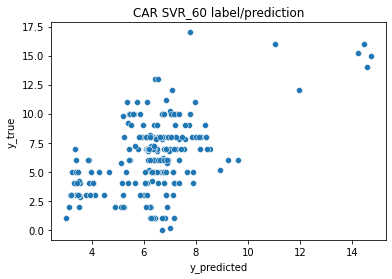

In [175]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_05,y_train_car_60_05)
y_p_car_svr_60_05 = pipeline_svr_car.predict(X_test_car_60_05)
y_car_pip_svr_60_05 = y_test_car_60_05

print("y predette: ")
print(y_p_car_svr_60_05)
y_pred_05 = pd.DataFrame(y_p_car_svr_60_05, columns=["y_predict"])
print(y_pred_05)
print("y vere")
print(y_test_car_60_05.values)
y_true_05 = pd.DataFrame(y_test_car_60_05.values, columns=["y_true"])
print(y_true_05)
y_car60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_car60_05.to_csv("y_t_p_car_svr_60_05.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_05, y_p_car_svr_60_05)
print("MSE_car_pip_svr_60_05:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_05, y_p_car_svr_60_05)
print("MAE_car_pip_svr_60_05:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_05, y_p_car_svr_60_05)
print("R2_car_score_svr_60_05:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_05))*100
print("MSPE_car_pip_svr_60_05:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_05))*100
print("MAPE_car_pip_svr_60_05:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_05, y_car_pip_svr_60_05.values, "SVR_60")

In [239]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_15,y_train_car_60_15)
y_p_car_svr_60_15 = pipeline_svr_car.predict(X_test_car_60_15)
y_car_pip_svr_60_15 = y_test_car_60_15

y_pred_15 = pd.DataFrame(y_p_car_svr_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_car_60_15.values, columns=["y_true"])

y_car60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_car60_15.to_csv("y_t_p_car_svr_60_15.csv")
with open('svr_car_15.pkl', 'wb') as file:
    s = pickle.dump(pipeline_svr_car, file)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [251]:
model = SVR(kernel = 'rbf',epsilon=0.1, C=10)
model.fit(X_train_car_60_15, y_train_car_60_15)
with open('svr_car_15.pkl', 'wb') as file:
    s = pickle.dump(model, file)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [178]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_20,y_train_car_60_20)
y_p_car_svr_60_20 = pipeline_svr_car.predict(X_test_car_60_20)
y_car_pip_svr_60_20 = y_test_car_60_20

y_pred_20 = pd.DataFrame(y_p_car_svr_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_car_60_20.values, columns=["y_true"])

y_car60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_car60_20.to_csv("y_t_p_car_svr_60_20.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y predette: 
[ 4.44344721  4.41301666  2.81821352  5.96361058  7.93034831  8.37119029
  1.44149844  2.35420224  7.86454201  4.82572818  8.62320882 -0.04060455
  5.71129865  7.76128789 16.75824767  5.59918362  5.17511437  3.61125505
  8.62475174  8.82631638  4.74826367  5.27970335  6.7947596  10.88778256
  7.57839785  5.47599219  3.31874451  7.59820166  7.63461648  7.15155582
  5.01755372  9.71888543  7.60488009  7.90355053  3.77862289  1.44275787
 10.95383511  9.14011004  9.75761168  3.32795031  2.80476263  9.20066363
  9.37807366  3.19240076  8.70787749  4.35721121  5.7421292   8.06787549
  3.60931238 10.46962378  4.82331218  8.09153976  5.48418176  8.04102889
  4.43115162  1.51516031  6.88980755  4.25471828  7.71266956  9.86456639
  6.91950135  0.9689244  10.06665256  7.52036512  9.33964264  5.03897201
  6.12820504  2.94330335  4.67679617  4.42088293  4.70973095  6.8662595
  3.62201312 14.3268246   0.22842078 -0.17092846  9.54218693  9.10090312
  6.37484702  7.06552727  3.51652899  7

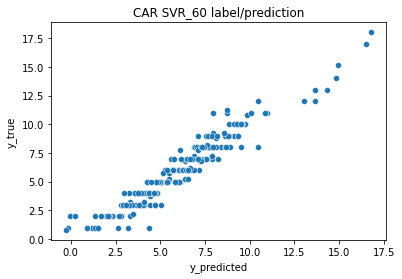

In [60]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_25,y_train_car_60_25)
y_p_car_svr_60_25 = pipeline_svr_car.predict(X_test_car_60_25)
y_car_pip_svr_60_25 = y_test_car_60_25

print("y predette: ")
print(y_p_car_svr_60_25)
y_pred_25 = pd.DataFrame(y_p_car_svr_60_25, columns=["y_predict"])
print(y_pred_25)
print("y vere")
print(y_test_car_60_25.values)
y_true_25 = pd.DataFrame(y_test_car_60_25.values, columns=["y_true"])
print(y_true_25)
y_car60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_car60_25.to_csv("y_t_p_car_svr_60_25.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_25, y_p_car_svr_60_25)
print("MSE_car_pip_svr_60_25:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_25, y_p_car_svr_60_25)
print("MAE_car_pip_svr_60_25:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_25, y_p_car_svr_60_25)
print("R2_car_score_svr_60_25:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_25))*100
print("MSPE_car_pip_svr_60_25:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_25))*100
print("MAPE_car_pip_svr_60_25:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_25, y_car_pip_svr_60_25.values, "SVR_60")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y predette: 
[ 8.75552774 14.86301555  4.5623845   9.27188694  4.37425192  2.4763443
 12.28964961  3.15739938  8.37806687  1.10909748  6.07923604  3.58716113
  3.88432268  7.36102395  4.96803121  7.87911288  7.86330465  9.62203032
  0.84540728  8.00548759  7.89719456  8.15798513  6.01478506 12.2465048
  6.86769106  3.87145387  5.4278958   6.83048451  6.27413334 10.49863527
  8.29459975  6.28511656  2.8716279   7.1369718   8.94636598  5.09955377
  4.54302943  5.52878763  3.34593709  8.45542969  8.949379    4.84685747
  5.10757844  5.31662577  5.92217313  4.85246402  8.30212999  8.16946459
  5.28784805  8.36500439  7.30449482  6.2811402  13.04753319  3.11983673
  8.2996918   7.7305072  11.5840902   7.97163819  8.38451656  2.64494418
  4.02737127  7.37736734 12.14478655 12.75748859  8.97172179  9.0194781
 11.12403035  7.51282388  6.10770156  6.13522048  7.00388539  8.32182731
  7.57608025  7.00814213  5.28615438  4.06107431  9.18184984  2.67307294
  6.25460834  6.77289582  6.34773333 15.1

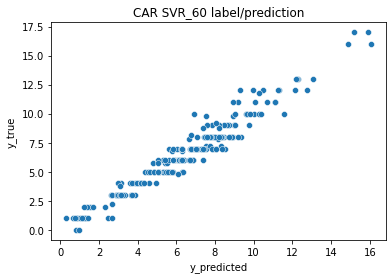

In [61]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_50,y_train_car_60_50)
y_p_car_svr_60_50 = pipeline_svr_car.predict(X_test_car_60_50)
y_car_pip_svr_60_50 = y_test_car_60_50

print("y predette: ")
print(y_p_car_svr_60_50)
y_pred_50 = pd.DataFrame(y_p_car_svr_60_50, columns=["y_predict"])
print(y_pred_50)
print("y vere")
print(y_test_car_60_50.values)
y_true_50 = pd.DataFrame(y_test_car_60_50.values, columns=["y_true"])
print(y_true_50)
y_car60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_car60_50.to_csv("y_t_p_car_svr_60_50.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_50, y_p_car_svr_60_50)
print("MSE_car_pip_svr_60_50:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_50, y_p_car_svr_60_50)
print("MAE_car_pip_svr_60_50:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_50, y_p_car_svr_60_50)
print("R2_car_score_svr_60_50:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_50))*100
print("MSPE_car_pip_svr_60_50:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_50))*100
print("MAPE_car_pip_svr_60_50:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_50, y_car_pip_svr_60_50.values, "SVR_60")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y predette: 
[ 7.30735422  2.94287829 10.24370656  8.7435498   9.93336268  8.27807166
  3.17115968  7.04298109  4.46952448 10.15144015  6.74412521  5.90819448
  4.76019089  2.82655221  6.1988325   6.13994271  8.91587594  5.74347981
  4.00247164  8.12251681  6.10665987  5.890931    2.3453508   1.53672297
  5.79712038  5.71209981  6.19755319  3.22342887 10.06723728  4.2481751
  6.5123804   8.78669985  1.59834705  7.87743586  8.10599251  3.05381359
  4.9754166   6.70919248  4.12221096  9.05452341  3.68314746  5.85443669
  9.05038839  0.50454963  6.09627294  9.29318768 10.03763988  5.88828621
  3.25886461  8.27220885  8.57109998  0.73850562  1.42282682  7.045987
  5.57801578  7.53404569  8.57552754  4.32484568  3.15700209  7.34442665
 10.40515767  5.49586867  7.63614029  6.09540058  3.06656966  6.89649176
  9.26862017  3.25491275  9.39331396  9.00812887  9.40936106  3.2412254
  3.252917    6.97932766  5.77221734  5.59287947  2.98567495  7.87885221
  5.38305417  4.22199322  8.01025758  1.54

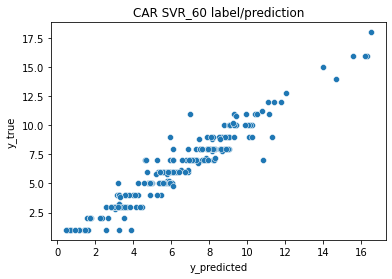

In [63]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_75,y_train_car_60_75)
y_p_car_svr_60_75 = pipeline_svr_car.predict(X_test_car_60_75)
y_car_pip_svr_60_75 = y_test_car_60_75

print("y predette: ")
print(y_p_car_svr_60_75)
y_pred_75 = pd.DataFrame(y_p_car_svr_60_75, columns=["y_predict"])
print(y_pred_75)
print("y vere")
print(y_test_car_60_75.values)
y_true_75 = pd.DataFrame(y_test_car_60_75.values, columns=["y_true"])
print(y_true_75)
y_car60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_car60_75.to_csv("y_t_p_car_svr_60_75.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_75, y_p_car_svr_60_75)
print("MSE_car_pip_svr_60_75:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_75, y_p_car_svr_60_75)
print("MAE_car_pip_svr_60_75:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_75, y_p_car_svr_60_75)
print("R2_car_score_svr_60_75:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_75))*100
print("MSPE_car_pip_svr_60_75:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_75))*100
print("MAPE_car_pip_svr_60_75:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_75, y_car_pip_svr_60_75.values, "SVR_60")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y predette: 
[10.25042265  3.09709425  5.34593612  6.11903956  3.23765497  2.78531611
  2.68851121  4.3078885   5.73255977  6.04936957  3.30246634  4.08888224
  5.66669626  2.66173802  4.84910705  3.78424905  5.72991843  5.45018962
  2.17988496  6.33563374  4.22101459  1.99668609  6.48844614  7.74475193
  8.11670485  6.67154808  8.69320392  3.12722839  6.02378124  6.18200972
  6.85486905  7.06890129  7.22612294 10.67066905  8.12289113  3.34931148
 13.83548348  3.61277071  6.98084367  6.94011618  3.38258446  9.16194152
  8.92792354 13.23790322  2.64256401 11.78410509  7.47434643  5.1331901
  6.75665681  8.12826788  3.13784748  2.1881637   3.20899653  4.82521612
  3.95715766  6.88124454  4.3796031   9.07767239  5.37201355 11.58069977
  2.95650792  5.45796708  8.69905487  7.87053797  6.2138168   9.62253821
 10.63350596  7.89457861  8.60431349 10.26371363  2.17064584  8.75680971
  4.96984951  5.74563776  9.65068483  1.55618078  1.56048405  9.965736
  4.42286882 10.22706254  4.2060929   2.0

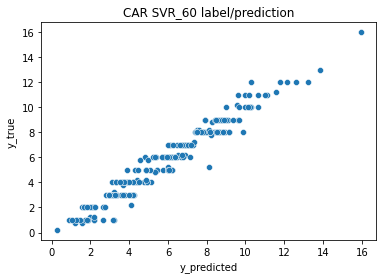

In [64]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_100,y_train_car_60_100)
y_p_car_svr_60_100 = pipeline_svr_car.predict(X_test_car_60_100)
y_car_pip_svr_60_100= y_test_car_60_100

print("y predette: ")
print(y_p_car_svr_60_100)
y_pred_100 = pd.DataFrame(y_p_car_svr_60_100, columns=["y_predict"])
print(y_pred_100)
print("y vere")
print(y_test_car_60_100.values)
y_true_100 = pd.DataFrame(y_test_car_60_100.values, columns=["y_true"])
print(y_true_100)
y_car60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_car60_100.to_csv("y_t_p_car_svr_60_100.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_100, y_p_car_svr_60_100)
print("MSE_car_pip_svr_60_100:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_100, y_p_car_svr_60_100)
print("MAE_car_pip_svr_60_100:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_100, y_p_car_svr_60_100)
print("R2_car_score_svr_60_100:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_100))*100
print("MSPE_car_pip_svr_60_100:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_100))*100
print("MAPE_car_pip_svr_60_100:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_100, y_car_pip_svr_60_100.values, "SVR_60")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


y predette: 
[ 1.08100786  8.60222111  6.95524484  7.02810739  7.20656183  3.257129
  5.86166995  8.77470243  8.33555427  3.65480613  1.38216836  7.73173818
  1.98575035  7.72488545  3.63013853 11.19641457  7.33745913  7.48487251
 11.37864736  7.84773957  4.12863941  2.49358497  4.58460668  7.80382579
  8.24510491  6.45896893  7.77077534  7.54889444  2.44830514  5.10408813
  7.83692329  3.89993518  8.31614841  0.80349776  6.40623881  6.23707484
  9.23375826  5.66306174  4.05369387  4.63027472  0.86349904  7.45668633
  1.66503888  6.06951463  8.03897443  2.8810262   3.17119385  6.73266923
  5.09228721  4.46053224  5.09758222  5.82012846  5.03697925  3.24474148
  8.23227032  4.67588282  8.69688361  7.18167173  3.25369762  9.34880275
  7.61805504  2.84854594  3.27176891  7.25903017 11.05948908  3.75962462
  2.43732878  6.59642805  7.15170138  4.82156889  1.65012385  1.30843869
  1.83176725  7.64892446  1.57539061  8.82760148  3.71286341  3.46642309
  8.03092676  3.57569656  2.60140798  3.

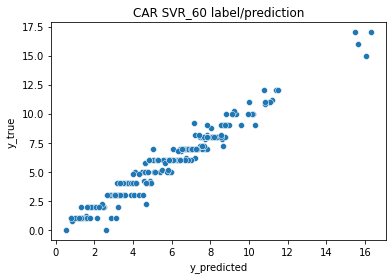

In [65]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_125,y_train_car_60_125)
y_p_car_svr_60_125 = pipeline_svr_car.predict(X_test_car_60_125)
y_car_pip_svr_60_125= y_test_car_60_125

print("y predette: ")
print(y_p_car_svr_60_125)
y_pred_125 = pd.DataFrame(y_p_car_svr_60_125, columns=["y_predict"])
print(y_pred_125)
print("y vere")
print(y_test_car_60_125.values)
y_true_125 = pd.DataFrame(y_test_car_60_125.values, columns=["y_true"])
print(y_true_125)
y_car60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_car60_125.to_csv("y_t_p_car_svr_60_125.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_125, y_p_car_svr_60_125)
print("MSE_car_pip_svr_60_125:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_125, y_p_car_svr_60_125)
print("MAE_car_pip_svr_60_125:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_125, y_p_car_svr_60_125)
print("R2_car_score_svr_60_125:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_125))*100
print("MSPE_car_pip_svr_60_125:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_125))*100
print("MAPE_car_pip_svr_60_125:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_125, y_car_pip_svr_60_125.values, "SVR_60")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE_car_pip_svr_60_150: 0.4942750889645332
MAE_car_pip_svr_60_150: 0.5011558286617759
R2_car_score_svr_60_150: 0.9563246371307106
MSPE_car_pip_svr_60_150: 0    7.911523
dtype: float64
MAPE_car_pip_svr_60_150: 0    8.021659
dtype: float64


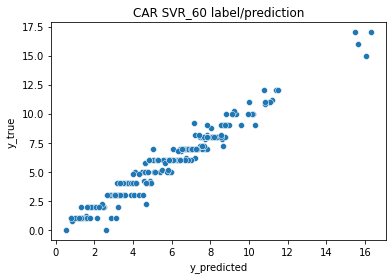

In [66]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_150,y_train_car_60_150)
y_p_car_svr_60_150 = pipeline_svr_car.predict(X_test_car_60_150)
y_car_pip_svr_60_150= y_test_car_60_150


y_pred_150 = pd.DataFrame(y_p_car_svr_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_car_60_150.values, columns=["y_true"])

y_car60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_car60_150.to_csv("y_t_p_car_svr_60_150.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_150, y_p_car_svr_60_150)
print("MSE_car_pip_svr_60_150:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_150, y_p_car_svr_60_150)
print("MAE_car_pip_svr_60_150:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_150, y_p_car_svr_60_150)
print("R2_car_score_svr_60_150:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_150))*100
print("MSPE_car_pip_svr_60_150:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_150))*100
print("MAPE_car_pip_svr_60_150:", mape_car_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_car_svr_60_125, y_car_pip_svr_60_125.values, "SVR_60")

In [67]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_175,y_train_car_60_175)
y_p_car_svr_60_175 = pipeline_svr_car.predict(X_test_car_60_175)
y_car_pip_svr_60_175= y_test_car_60_175


y_pred_175 = pd.DataFrame(y_p_car_svr_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_car_60_175.values, columns=["y_true"])

y_car60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_car60_175.to_csv("y_t_p_car_svr_60_175.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_175, y_p_car_svr_60_175)
print("MSE_car_pip_svr_60_175:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_175, y_p_car_svr_60_175)
print("MAE_car_pip_svr_60_175:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_175, y_p_car_svr_60_175)
print("R2_car_score_svr_60_175:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_175))*100
print("MSPE_car_pip_svr_60_175:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_175))*100
print("MAPE_car_pip_svr_60_175:", mape_car_pip_svr_60)

MSE_car_pip_svr_60_175: 0.4152545422586325
MAE_car_pip_svr_60_175: 0.48406828880357006
R2_car_score_svr_60_175: 0.963201653034038
MSPE_car_pip_svr_60_175: 0    6.346934
dtype: float64
MAPE_car_pip_svr_60_175: 0    7.398713
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_200,y_train_car_60_200)
y_p_car_svr_60_200 = pipeline_svr_car.predict(X_test_car_60_200)
y_car_pip_svr_60_200= y_test_car_60_200


y_pred_200 = pd.DataFrame(y_p_car_svr_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_car_60_200.values, columns=["y_true"])

y_car60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_car60_200.to_csv("y_t_p_car_svr_60_200.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_200, y_p_car_svr_60_200)
print("MSE_car_pip_svr_60_200:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_200, y_p_car_svr_60_200)
print("MAE_car_pip_svr_60_200:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_200, y_p_car_svr_60_200)
print("R2_car_score_svr_60_200:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_200))*100
print("MSPE_car_pip_svr_60_200:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_200))*100
print("MAPE_car_pip_svr_60_200:", mape_car_pip_svr_60)

MSE_car_pip_svr_60_200: 0.5046764449406498
MAE_car_pip_svr_60_200: 0.5330192079805862
R2_car_score_svr_60_200: 0.9567236046286457
MSPE_car_pip_svr_60_200: 0    7.869029
dtype: float64
MAPE_car_pip_svr_60_200: 0    8.310955
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [69]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car_60_225,y_train_car_60_225)
y_p_car_svr_60_225 = pipeline_svr_car.predict(X_test_car_60_225)
y_car_pip_svr_60_225= y_test_car_60_225


y_pred_225 = pd.DataFrame(y_p_car_svr_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_car_60_225.values, columns=["y_true"])

y_car60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_car60_225.to_csv("y_t_p_car_svr_60_225.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr_60 = mean_squared_error(y_car_pip_svr_60_225, y_p_car_svr_60_225)
print("MSE_car_pip_svr_60_225:", mse_car_pip_svr_60)
mae_car_pip_svr_60 = mean_absolute_error(y_car_pip_svr_60_225, y_p_car_svr_60_225)
print("MAE_car_pip_svr_60_225:", mae_car_pip_svr_60)
r2_car_score_svr_60= r2_score(y_car_pip_svr_60_225, y_p_car_svr_60_225)
print("R2_car_score_svr_60_225:", r2_car_score_svr_60)

mspe_car_pip_svr_60 = (mse_car_pip_svr_60/np.mean(y_car_pip_svr_60_225))*100
print("MSPE_car_pip_svr_60_225:", mspe_car_pip_svr_60)
mape_car_pip_svr_60 = (mae_car_pip_svr_60/np.mean(y_car_pip_svr_60_225))*100
print("MAPE_car_pip_svr_60_225:", mape_car_pip_svr_60)

MSE_car_pip_svr_60_225: 0.4803136172696231
MAE_car_pip_svr_60_225: 0.5015029858703776
R2_car_score_svr_60_225: 0.9595326129206296
MSPE_car_pip_svr_60_225: 0    7.606159
dtype: float64
MAPE_car_pip_svr_60_225: 0    7.94171
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [181]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_05,y_train_camion_60_05)
y_p_camion_svr_60_05 = pipeline_svr_camion.predict(X_test_camion_60_05)
y_camion_pip_svr_60_05 = y_test_camion_60_05


y_pred_05 = pd.DataFrame(y_p_camion_svr_60_05, columns=["y_predict"])
y_true_05 = pd.DataFrame(y_test_camion_60_05.values, columns=["y_true"])
y_camion60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_camion60_05.to_csv("y_t_p_camion_svr_60_05.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [182]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_10,y_train_camion_60_10)
y_p_camion_svr_60_10 = pipeline_svr_camion.predict(X_test_camion_60_10)
y_camion_pip_svr_60_10 = y_test_camion_60_10


y_pred_10 = pd.DataFrame(y_p_camion_svr_60_10, columns=["y_predict"])
y_true_10 = pd.DataFrame(y_test_camion_60_10.values, columns=["y_true"])
y_camion60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_camion60_10.to_csv("y_t_p_camion_svr_60_10.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [240]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_15,y_train_camion_60_15)
y_p_camion_svr_60_15 = pipeline_svr_camion.predict(X_test_camion_60_15)
y_camion_pip_svr_60_15 = y_test_camion_60_15


y_pred_15 = pd.DataFrame(y_p_camion_svr_60_15, columns=["y_predict"])
y_true_15 = pd.DataFrame(y_test_camion_60_15.values, columns=["y_true"])
y_camion60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_camion60_15.to_csv("y_t_p_camion_svr_60_15.csv")
with open('svr_camion_15.pkl', 'wb') as file:
    s = pickle.dump(pipeline_svr_camion, file)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [242]:
print(s)

None


In [184]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_20,y_train_camion_60_20)
y_p_camion_svr_60_20 = pipeline_svr_camion.predict(X_test_camion_60_20)
y_camion_pip_svr_60_20 = y_test_camion_60_20


y_pred_20 = pd.DataFrame(y_p_camion_svr_60_20, columns=["y_predict"])
y_true_20 = pd.DataFrame(y_test_camion_60_20.values, columns=["y_true"])
y_camion60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_camion60_20.to_csv("y_t_p_camion_svr_60_20.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


     y_true
0       2.0
1       0.0
2       0.0
3       5.0
4       1.0
..      ...
218     1.0
219     7.0
220     3.0
221     3.0
222     1.0

[223 rows x 1 columns]
MSE_camion_pip_svr_60_25: 0.14358320795417157
MAE_camion_pip_svr_60_25: 0.27409116306877057
R2_camion_score_svr_60_25: 0.968163636811177
MSPE_camion_pip_svr_60_25: 0    4.539135
dtype: float64
MAPE_camion_pip_svr_60_25: 0    8.664918
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


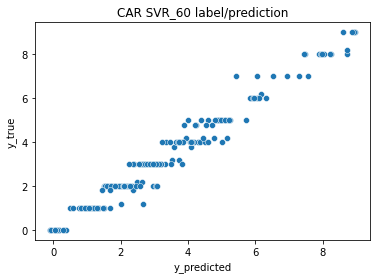

In [70]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_25,y_train_camion_60_25)
y_p_camion_svr_60_25 = pipeline_svr_camion.predict(X_test_camion_60_25)
y_camion_pip_svr_60_25 = y_test_camion_60_25


y_pred_25 = pd.DataFrame(y_p_camion_svr_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_camion_60_25.values, columns=["y_true"])
print(y_true_25)
y_camion60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_camion60_25.to_csv("y_t_p_camion_svr_60_25.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_camion_pip_svr_60 = mean_squared_error(y_camion_pip_svr_60_25, y_p_camion_svr_60_25)
print("MSE_camion_pip_svr_60_25:", mse_camion_pip_svr_60)
mae_camion_pip_svr_60 = mean_absolute_error(y_camion_pip_svr_60_25, y_p_camion_svr_60_25)
print("MAE_camion_pip_svr_60_25:", mae_camion_pip_svr_60)
r2_camion_score_svr_60= r2_score(y_camion_pip_svr_60_25, y_p_camion_svr_60_25)
print("R2_camion_score_svr_60_25:", r2_camion_score_svr_60)

mspe_camion_pip_svr_60 = (mse_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_25))*100
print("MSPE_camion_pip_svr_60_25:", mspe_camion_pip_svr_60)
mape_camion_pip_svr_60 = (mae_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_25))*100
print("MAPE_camion_pip_svr_60_25:", mape_camion_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_camion_svr_60_25, y_camion_pip_svr_60_25.values, "SVR_60")

array([0.0, 0.0, 0.0, 0.0, 3.0138282188935393e+27, 3.329475369629897e+26,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6593596100456067e+23,
       0.0, 3.3616811943184974e+27, 0.0, 0.0, 2.495497341233517e+27, 0.0,
       0.0, 1.7778127858780814e+26, 0.0, 1.723418386894399e+27, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.1495531280023697e+27, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3485959092416217e+26,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.015743501525

     y_true
0       3.0
1       2.0
2       1.0
3       2.8
4       1.0
..      ...
218     1.0
219     0.0
220     4.0
221     4.2
222     1.0

[223 rows x 1 columns]
MSE_camion_pip_svr_60_50: 0.08896365049645728
MAE_camion_pip_svr_60_50: 0.2115511796704921
R2_camion_score_svr_60_50: 0.9772930489984762
MSPE_camion_pip_svr_60_50: 0    2.828471
dtype: float64
MAPE_camion_pip_svr_60_50: 0    6.725964
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


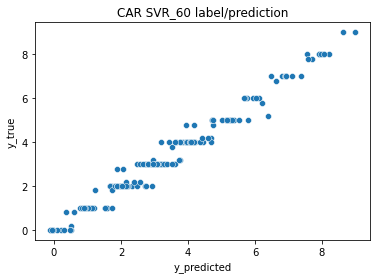

In [71]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_50,y_train_camion_60_50)
y_p_camion_svr_60_50 = pipeline_svr_camion.predict(X_test_camion_60_50)
y_camion_pip_svr_60_50 = y_test_camion_60_50


y_pred_50 = pd.DataFrame(y_p_camion_svr_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_camion_60_50.values, columns=["y_true"])
print(y_true_50)
y_camion60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_camion60_50.to_csv("y_t_p_camion_svr_60_50.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_camion_pip_svr_60 = mean_squared_error(y_camion_pip_svr_60_50, y_p_camion_svr_60_50)
print("MSE_camion_pip_svr_60_50:", mse_camion_pip_svr_60)
mae_camion_pip_svr_60 = mean_absolute_error(y_camion_pip_svr_60_50, y_p_camion_svr_60_50)
print("MAE_camion_pip_svr_60_50:", mae_camion_pip_svr_60)
r2_camion_score_svr_60= r2_score(y_camion_pip_svr_60_50, y_p_camion_svr_60_50)
print("R2_camion_score_svr_60_50:", r2_camion_score_svr_60)

mspe_camion_pip_svr_60 = (mse_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_50))*100
print("MSPE_camion_pip_svr_60_50:", mspe_camion_pip_svr_60)
mape_camion_pip_svr_60 = (mae_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_50))*100
print("MAPE_camion_pip_svr_60_50:", mape_camion_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_camion_svr_60_50, y_camion_pip_svr_60_50.values, "SVR_60")

     y_true
0       8.0
1       1.0
2       6.0
3       2.8
4       5.0
..      ...
218     2.0
219     3.0
220     0.0
221     6.0
222     3.0

[223 rows x 1 columns]
MSE_camion_pip_svr_60_75: 0.13929077570882922
MAE_camion_pip_svr_60_75: 0.25201118884705587
R2_camion_score_svr_60_75: 0.9664608696148662
MSPE_camion_pip_svr_60_75: 0    4.420985
dtype: float64
MAPE_camion_pip_svr_60_75: 0    7.998647
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


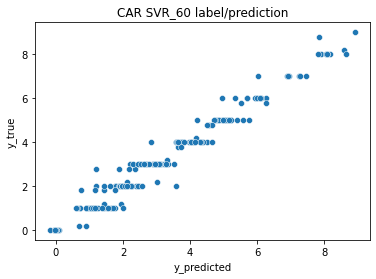

In [72]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_75,y_train_camion_60_75)
y_p_camion_svr_60_75 = pipeline_svr_camion.predict(X_test_camion_60_75)
y_camion_pip_svr_60_75 = y_test_camion_60_75


y_pred_75 = pd.DataFrame(y_p_camion_svr_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_camion_60_75.values, columns=["y_true"])
print(y_true_75)
y_camion60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_camion60_75.to_csv("y_t_p_camion_svr_60_75.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_camion_pip_svr_60 = mean_squared_error(y_camion_pip_svr_60_75, y_p_camion_svr_60_75)
print("MSE_camion_pip_svr_60_75:", mse_camion_pip_svr_60)
mae_camion_pip_svr_60 = mean_absolute_error(y_camion_pip_svr_60_75, y_p_camion_svr_60_75)
print("MAE_camion_pip_svr_60_75:", mae_camion_pip_svr_60)
r2_camion_score_svr_60= r2_score(y_camion_pip_svr_60_75, y_p_camion_svr_60_75)
print("R2_camion_score_svr_60_75:", r2_camion_score_svr_60)

mspe_camion_pip_svr_60 = (mse_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_75))*100
print("MSPE_camion_pip_svr_60_75:", mspe_camion_pip_svr_60)
mape_camion_pip_svr_60 = (mae_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_75))*100
print("MAPE_camion_pip_svr_60_75:", mape_camion_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_camion_svr_60_75, y_camion_pip_svr_60_75.values, "SVR_60")

     y_true
0       4.0
1       4.0
2       6.0
3       1.0
4       0.0
..      ...
218     1.0
219     1.0
220     1.0
221     1.0
222     6.0

[223 rows x 1 columns]
MSE_camion_pip_svr_60_100: 0.11056912888884222
MAE_camion_pip_svr_60_100: 0.21806246326354753
R2_camion_score_svr_60_100: 0.9786926725688135
MSPE_camion_pip_svr_60_100: 0    3.415085
dtype: float64
MAPE_camion_pip_svr_60_100: 0    6.73517
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


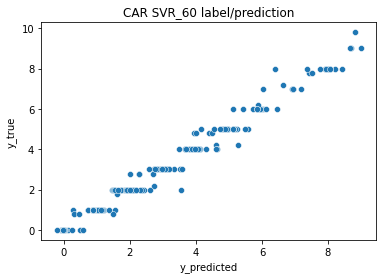

In [73]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_100,y_train_camion_60_100)
y_p_camion_svr_60_100 = pipeline_svr_camion.predict(X_test_camion_60_100)
y_camion_pip_svr_60_100 = y_test_camion_60_100


y_pred_100 = pd.DataFrame(y_p_camion_svr_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_camion_60_100.values, columns=["y_true"])
print(y_true_100)
y_camion60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_camion60_100.to_csv("y_t_p_camion_svr_60_100.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_camion_pip_svr_60 = mean_squared_error(y_camion_pip_svr_60_100, y_p_camion_svr_60_100)
print("MSE_camion_pip_svr_60_100:", mse_camion_pip_svr_60)
mae_camion_pip_svr_60 = mean_absolute_error(y_camion_pip_svr_60_100, y_p_camion_svr_60_100)
print("MAE_camion_pip_svr_60_100:", mae_camion_pip_svr_60)
r2_camion_score_svr_60= r2_score(y_camion_pip_svr_60_100, y_p_camion_svr_60_100)
print("R2_camion_score_svr_60_100:", r2_camion_score_svr_60)

mspe_camion_pip_svr_60 = (mse_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_100))*100
print("MSPE_camion_pip_svr_60_100:", mspe_camion_pip_svr_60)
mape_camion_pip_svr_60 = (mae_camion_pip_svr_60/np.mean(y_camion_pip_svr_60_100))*100
print("MAPE_camion_pip_svr_60_100:", mape_camion_pip_svr_60)

###STAMPA GRAFICI 

graf_car(y_p_camion_svr_60_100, y_camion_pip_svr_60_100.values, "SVR_60")

In [74]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_125,y_train_camion_60_125)
y_p_camion_svr_60_125 = pipeline_svr_camion.predict(X_test_camion_60_125)
y_camion_pip_svr_60_125 = y_test_camion_60_125


y_pred_125 = pd.DataFrame(y_p_camion_svr_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_camion_60_125.values, columns=["y_true"])
y_camion60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_camion60_125.to_csv("y_t_p_camion_svr_60_125.csv")



C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_150,y_train_camion_60_150)
y_p_camion_svr_60_150 = pipeline_svr_camion.predict(X_test_camion_60_150)
y_camion_pip_svr_60_150 = y_test_camion_60_150


y_pred_150 = pd.DataFrame(y_p_camion_svr_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_camion_60_150.values, columns=["y_true"])
y_camion60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_camion60_150.to_csv("y_t_p_camion_svr_60_150.csv")


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [76]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_175,y_train_camion_60_175)
y_p_camion_svr_60_175 = pipeline_svr_camion.predict(X_test_camion_60_175)
y_camion_pip_svr_60_175 = y_test_camion_60_175


y_pred_175 = pd.DataFrame(y_p_camion_svr_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_camion_60_175.values, columns=["y_true"])
y_camion60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_camion60_175.to_csv("y_t_p_camion_svr_60_175.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [78]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_200,y_train_camion_60_200)
y_p_camion_svr_60_200 = pipeline_svr_camion.predict(X_test_camion_60_200)
y_camion_pip_svr_60_200 = y_test_camion_60_200


y_pred_200 = pd.DataFrame(y_p_camion_svr_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_camion_60_200.values, columns=["y_true"])
y_camion60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_camion60_200.to_csv("y_t_p_camion_svr_60_200.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [79]:
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1, C=10))
]


pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion_60_225,y_train_camion_60_225)
y_p_camion_svr_60_225 = pipeline_svr_camion.predict(X_test_camion_60_225)
y_camion_pip_svr_60_225 = y_test_camion_60_225


y_pred_225 = pd.DataFrame(y_p_camion_svr_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_camion_60_225.values, columns=["y_true"])
y_camion60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_camion60_225.to_csv("y_t_p_camion_svr_60_225.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [185]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_05,y_train_car_60_05)
y_p_car_MLPRegressor_60_05 = pipeline_MLPRegressor_car.predict(X_test_car_60_05)
y_car_pip_MLPRegressor_60_05 = y_test_car_60_05


y_pred_05 = pd.DataFrame(y_p_car_MLPRegressor_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_car_60_05.values, columns=["y_true"])

y_car60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_car60_05.to_csv("y_t_p_car_MLPRegressor_60_05.csv")


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [186]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_10,y_train_car_60_10)
y_p_car_MLPRegressor_60_10 = pipeline_MLPRegressor_car.predict(X_test_car_60_10)
y_car_pip_MLPRegressor_60_10 = y_test_car_60_10


y_pred_10 = pd.DataFrame(y_p_car_MLPRegressor_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_car_60_10.values, columns=["y_true"])

y_car60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_car60_10.to_csv("y_t_p_car_MLPRegressor_60_10.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [187]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_15,y_train_car_60_15)
y_p_car_MLPRegressor_60_15 = pipeline_MLPRegressor_car.predict(X_test_car_60_15)
y_car_pip_MLPRegressor_60_15 = y_test_car_60_15


y_pred_15 = pd.DataFrame(y_p_car_MLPRegressor_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_car_60_15.values, columns=["y_true"])

y_car60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_car60_15.to_csv("y_t_p_car_MLPRegressor_60_15.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [243]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_20,y_train_car_60_20)
y_p_car_MLPRegressor_60_20 = pipeline_MLPRegressor_car.predict(X_test_car_60_20)
y_car_pip_MLPRegressor_60_20 = y_test_car_60_20


y_pred_20 = pd.DataFrame(y_p_car_MLPRegressor_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_car_60_20.values, columns=["y_true"])

y_car60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_car60_20.to_csv("y_t_p_car_MLPRegressor_60_20.csv")
with open('mlp_car_20.pkl', 'wb') as file:
    s = pickle.dump(pipeline_MLPRegressor_car, file)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [254]:
model = MLPRegressor(hidden_layer_sizes=(100,100,100))
model.fit(X_train_car_60_20, y_train_car_60_20)
with open('mlp_car_20.pkl', 'wb') as file:
    s = pickle.dump(model, file)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE_car_pip_MLPRegressor_60_25: 0.8336456762146476
MAE_car_pip_MLPRegressor_60_25: 0.7077492023525062
R2_car_score_MLPRegressor_60_25: 0.9162673988966885
MSPE_car_pip_MLPRegressor_60_25: 0    13.887867
dtype: float64
MAPE_car_pip_MLPRegressor_60_25: 0    11.790533
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


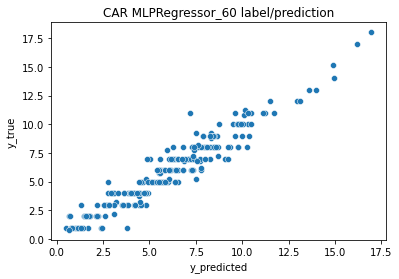

In [80]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_25,y_train_car_60_25)
y_p_car_MLPRegressor_60_25 = pipeline_MLPRegressor_car.predict(X_test_car_60_25)
y_car_pip_MLPRegressor_60_25 = y_test_car_60_25


y_pred_25 = pd.DataFrame(y_p_car_MLPRegressor_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_car_60_25.values, columns=["y_true"])

y_car60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_car60_25.to_csv("y_t_p_car_MLPRegressor_60_25.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_MLPRegressor_60 = mean_squared_error(y_car_pip_MLPRegressor_60_25, y_p_car_MLPRegressor_60_25)
print("MSE_car_pip_MLPRegressor_60_25:", mse_car_pip_MLPRegressor_60)
mae_car_pip_MLPRegressor_60 = mean_absolute_error(y_car_pip_MLPRegressor_60_25, y_p_car_MLPRegressor_60_25)
print("MAE_car_pip_MLPRegressor_60_25:", mae_car_pip_MLPRegressor_60)
r2_car_score_MLPRegressor_60= r2_score(y_car_pip_MLPRegressor_60_25, y_p_car_MLPRegressor_60_25)
print("R2_car_score_MLPRegressor_60_25:", r2_car_score_MLPRegressor_60)

mspe_car_pip_MLPRegressor_60 = (mse_car_pip_MLPRegressor_60/np.mean(y_car_pip_MLPRegressor_60_25))*100
print("MSPE_car_pip_MLPRegressor_60_25:", mspe_car_pip_MLPRegressor_60)
mape_car_pip_MLPRegressor_60 = (mae_car_pip_MLPRegressor_60/np.mean(y_car_pip_MLPRegressor_60_25))*100
print("MAPE_car_pip_MLPRegressor_60_25:", mape_car_pip_MLPRegressor_60)

###STAMPA GRAFICI 

graf_car(y_p_car_MLPRegressor_60_25, y_car_pip_MLPRegressor_60_25.values, "MLPRegressor_60")
plt.show()


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE_car_pip_MLPRegressor_60_50: 0.6856060488909995
MAE_car_pip_MLPRegressor_60_50: 0.6208967864216374
R2_car_score_MLPRegressor_60_50: 0.9309640159540941
MSPE_car_pip_MLPRegressor_60_50: 0    10.50647
dtype: float64
MAPE_car_pip_MLPRegressor_60_50: 0    9.514842
dtype: float64


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


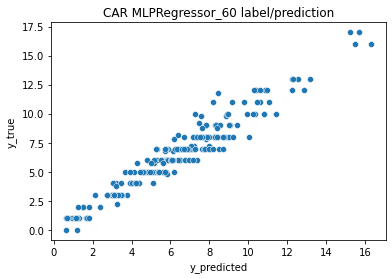

In [81]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_50,y_train_car_60_50)
y_p_car_MLPRegressor_60_50 = pipeline_MLPRegressor_car.predict(X_test_car_60_50)
y_car_pip_MLPRegressor_60_50 = y_test_car_60_50


y_pred_50 = pd.DataFrame(y_p_car_MLPRegressor_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_car_60_50.values, columns=["y_true"])

y_car60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_car60_50.to_csv("y_t_p_car_MLPRegressor_60_50.csv")

### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_MLPRegressor_60 = mean_squared_error(y_car_pip_MLPRegressor_60_50, y_p_car_MLPRegressor_60_50)
print("MSE_car_pip_MLPRegressor_60_50:", mse_car_pip_MLPRegressor_60)
mae_car_pip_MLPRegressor_60 = mean_absolute_error(y_car_pip_MLPRegressor_60_50, y_p_car_MLPRegressor_60_50)
print("MAE_car_pip_MLPRegressor_60_50:", mae_car_pip_MLPRegressor_60)
r2_car_score_MLPRegressor_60= r2_score(y_car_pip_MLPRegressor_60_50, y_p_car_MLPRegressor_60_50)
print("R2_car_score_MLPRegressor_60_50:", r2_car_score_MLPRegressor_60)

mspe_car_pip_MLPRegressor_60 = (mse_car_pip_MLPRegressor_60/np.mean(y_car_pip_MLPRegressor_60_50))*100
print("MSPE_car_pip_MLPRegressor_60_50:", mspe_car_pip_MLPRegressor_60)
mape_car_pip_MLPRegressor_60 = (mae_car_pip_MLPRegressor_60/np.mean(y_car_pip_MLPRegressor_60_50))*100
print("MAPE_car_pip_MLPRegressor_60_50:", mape_car_pip_MLPRegressor_60)

###STAMPA GRAFICI 

graf_car(y_p_car_MLPRegressor_60_50, y_car_pip_MLPRegressor_60_50.values, "MLPRegressor_60")
plt.show()

In [82]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_75,y_train_car_60_75)
y_p_car_MLPRegressor_60_75 = pipeline_MLPRegressor_car.predict(X_test_car_60_75)
y_car_pip_MLPRegressor_60_75 = y_test_car_60_75


y_pred_75 = pd.DataFrame(y_p_car_MLPRegressor_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_car_60_75.values, columns=["y_true"])

y_car60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_car60_75.to_csv("y_t_p_car_MLPRegressor_60_75.csv")


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_100,y_train_car_60_100)
y_p_car_MLPRegressor_60_100 = pipeline_MLPRegressor_car.predict(X_test_car_60_100)
y_car_pip_MLPRegressor_60_100 = y_test_car_60_100


y_pred_100 = pd.DataFrame(y_p_car_MLPRegressor_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_car_60_100.values, columns=["y_true"])

y_car60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_car60_100.to_csv("y_t_p_car_MLPRegressor_60_100.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [84]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_125,y_train_car_60_125)
y_p_car_MLPRegressor_60_125 = pipeline_MLPRegressor_car.predict(X_test_car_60_125)
y_car_pip_MLPRegressor_60_125 = y_test_car_60_125


y_pred_125 = pd.DataFrame(y_p_car_MLPRegressor_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_car_60_125.values, columns=["y_true"])

y_car60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_car60_125.to_csv("y_t_p_car_MLPRegressor_60_125.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [85]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_150,y_train_car_60_150)
y_p_car_MLPRegressor_60_150 = pipeline_MLPRegressor_car.predict(X_test_car_60_150)
y_car_pip_MLPRegressor_60_150 = y_test_car_60_150


y_pred_150 = pd.DataFrame(y_p_car_MLPRegressor_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_car_60_150.values, columns=["y_true"])

y_car60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_car60_150.to_csv("y_t_p_car_MLPRegressor_60_150.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_175,y_train_car_60_175)
y_p_car_MLPRegressor_60_175 = pipeline_MLPRegressor_car.predict(X_test_car_60_175)
y_car_pip_MLPRegressor_60_175 = y_test_car_60_175


y_pred_175 = pd.DataFrame(y_p_car_MLPRegressor_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_car_60_175.values, columns=["y_true"])

y_car60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_car60_175.to_csv("y_t_p_car_MLPRegressor_60_175.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [87]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_200,y_train_car_60_200)
y_p_car_MLPRegressor_60_200 = pipeline_MLPRegressor_car.predict(X_test_car_60_200)
y_car_pip_MLPRegressor_60_200 = y_test_car_60_200


y_pred_200 = pd.DataFrame(y_p_car_MLPRegressor_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_car_60_200.values, columns=["y_true"])

y_car60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_car60_200.to_csv("y_t_p_car_MLPRegressor_60_200.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [88]:
####MLP CAR_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100))),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car_60_225,y_train_car_60_225)
y_p_car_MLPRegressor_60_225 = pipeline_MLPRegressor_car.predict(X_test_car_60_225)
y_car_pip_MLPRegressor_60_225 = y_test_car_60_225


y_pred_225 = pd.DataFrame(y_p_car_MLPRegressor_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_car_60_225.values, columns=["y_true"])

y_car60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_car60_225.to_csv("y_t_p_car_MLPRegressor_60_225.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [189]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_05,y_train_camion_60_05)
y_p_camion_MLPRegressor_60_05 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_05)
y_camion_pip_MLPRegressor_60_05 = y_test_camion_60_05


y_pred_05 = pd.DataFrame(y_p_camion_MLPRegressor_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_camion_60_05.values, columns=["y_true"])

y_camion60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_camion60_05.to_csv("y_t_p_camion_MLPRegressor_60_05.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [191]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_10,y_train_camion_60_10)
y_p_camion_MLPRegressor_60_10 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_10)
y_camion_pip_MLPRegressor_60_10 = y_test_camion_60_10


y_pred_10 = pd.DataFrame(y_p_camion_MLPRegressor_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_camion_60_10.values, columns=["y_true"])

y_camion60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_camion60_10.to_csv("y_t_p_camion_MLPRegressor_60_10.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [190]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_15,y_train_camion_60_15)
y_p_camion_MLPRegressor_60_15 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_15)
y_camion_pip_MLPRegressor_60_15 = y_test_camion_60_15


y_pred_15 = pd.DataFrame(y_p_camion_MLPRegressor_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_camion_60_15.values, columns=["y_true"])

y_camion60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_camion60_15.to_csv("y_t_p_camion_MLPRegressor_60_15.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [244]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_20,y_train_camion_60_20)
y_p_camion_MLPRegressor_60_20 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_20)
y_camion_pip_MLPRegressor_60_20 = y_test_camion_60_20


y_pred_20 = pd.DataFrame(y_p_camion_MLPRegressor_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_camion_60_20.values, columns=["y_true"])

y_camion60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_camion60_20.to_csv("y_t_p_camion_MLPRegressor_60_20.csv")
with open('mlp_camion_20.pkl', 'wb') as file:
    s = pickle.dump(pipeline_MLPRegressor_camion, file)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_25,y_train_camion_60_25)
y_p_camion_MLPRegressor_60_25 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_25)
y_camion_pip_MLPRegressor_60_25 = y_test_camion_60_25


y_pred_25 = pd.DataFrame(y_p_camion_MLPRegressor_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_camion_60_25.values, columns=["y_true"])

y_camion60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_camion60_25.to_csv("y_t_p_camion_MLPRegressor_60_25.csv")


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_50,y_train_camion_60_50)
y_p_camion_MLPRegressor_60_50 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_50)
y_camion_pip_MLPRegressor_60_50 = y_test_camion_60_50


y_pred_50 = pd.DataFrame(y_p_camion_MLPRegressor_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_camion_60_50.values, columns=["y_true"])

y_camion60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_camion60_50.to_csv("y_t_p_camion_MLPRegressor_60_50.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [91]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_75,y_train_camion_60_75)
y_p_camion_MLPRegressor_60_75 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_75)
y_camion_pip_MLPRegressor_60_75 = y_test_camion_60_75


y_pred_75 = pd.DataFrame(y_p_camion_MLPRegressor_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_camion_60_75.values, columns=["y_true"])

y_camion60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_camion60_75.to_csv("y_t_p_camion_MLPRegressor_60_75.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [92]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_100,y_train_camion_60_100)
y_p_camion_MLPRegressor_60_100 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_100)
y_camion_pip_MLPRegressor_60_100 = y_test_camion_60_100


y_pred_100 = pd.DataFrame(y_p_camion_MLPRegressor_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_camion_60_100.values, columns=["y_true"])

y_camion60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_camion60_100.to_csv("y_t_p_camion_MLPRegressor_60_100.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [93]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_125,y_train_camion_60_125)
y_p_camion_MLPRegressor_60_125 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_125)
y_camion_pip_MLPRegressor_60_125 = y_test_camion_60_125


y_pred_125 = pd.DataFrame(y_p_camion_MLPRegressor_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_camion_60_125.values, columns=["y_true"])

y_camion60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_camion60_125.to_csv("y_t_p_camion_MLPRegressor_60_125.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [94]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_150,y_train_camion_60_150)
y_p_camion_MLPRegressor_60_150 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_150)
y_camion_pip_MLPRegressor_60_150 = y_test_camion_60_150


y_pred_150 = pd.DataFrame(y_p_camion_MLPRegressor_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_camion_60_150.values, columns=["y_true"])

y_camion60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_camion60_150.to_csv("y_t_p_camion_MLPRegressor_60_150.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [95]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_175,y_train_camion_60_175)
y_p_camion_MLPRegressor_60_175 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_175)
y_camion_pip_MLPRegressor_60_175 = y_test_camion_60_175


y_pred_175 = pd.DataFrame(y_p_camion_MLPRegressor_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_camion_60_175.values, columns=["y_true"])

y_camion60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_camion60_175.to_csv("y_t_p_camion_MLPRegressor_60_175.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [96]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_200,y_train_camion_60_200)
y_p_camion_MLPRegressor_60_200 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_200)
y_camion_pip_MLPRegressor_60_200 = y_test_camion_60_200


y_pred_200 = pd.DataFrame(y_p_camion_MLPRegressor_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_camion_60_200.values, columns=["y_true"])

y_camion60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_camion60_200.to_csv("y_t_p_camion_MLPRegressor_60_200.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [97]:
####MLP CAMION_60####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(100,100,100,))),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion_60_225,y_train_camion_60_225)
y_p_camion_MLPRegressor_60_225 = pipeline_MLPRegressor_camion.predict(X_test_camion_60_225)
y_camion_pip_MLPRegressor_60_225 = y_test_camion_60_225


y_pred_225 = pd.DataFrame(y_p_camion_MLPRegressor_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_camion_60_225.values, columns=["y_true"])

y_camion60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_camion60_225.to_csv("y_t_p_camion_MLPRegressor_60_225.csv")

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (668). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [193]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_05, y_train_car_60_05)
y_p_car_KNeighborsRegressor_60_05 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_05)
y_car_pip_KNeighborsRegressor_60_05 = y_test_car_60_05


y_pred_05 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_car_60_05.values, columns=["y_true"])

y_car60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_car60_05.to_csv("y_t_p_car_KNeighborsRegressor_60_05.csv")

In [196]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_10, y_train_car_60_10)
y_p_car_KNeighborsRegressor_60_10 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_10)
y_car_pip_KNeighborsRegressor_60_10 = y_test_car_60_10


y_pred_10 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_car_60_10.values, columns=["y_true"])

y_car60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_car60_10.to_csv("y_t_p_car_KNeighborsRegressor_60_10.csv")

In [245]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_15, y_train_car_60_15)
y_p_car_KNeighborsRegressor_60_15 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_15)
y_car_pip_KNeighborsRegressor_60_15 = y_test_car_60_15


y_pred_15 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_car_60_15.values, columns=["y_true"])

y_car60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_car60_15.to_csv("y_t_p_car_KNeighborsRegressor_60_15.csv")
with open('knn_car_15.pkl', 'wb') as file:
    s = pickle.dump(pipeline_KNeighborsRegressor_car, file)

In [255]:
model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train_car_60_15, y_train_car_60_15)
with open('knn_car_15.pkl', 'wb') as file:
    s = pickle.dump(model, file)

In [195]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_20, y_train_car_60_20)
y_p_car_KNeighborsRegressor_60_20 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_20)
y_car_pip_KNeighborsRegressor_60_20 = y_test_car_60_20


y_pred_20 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_car_60_20.values, columns=["y_true"])

y_car60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_car60_20.to_csv("y_t_p_car_KNeighborsRegressor_60_20.csv")

In [98]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_25, y_train_car_60_25)
y_p_car_KNeighborsRegressor_60_25 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_25)
y_car_pip_KNeighborsRegressor_60_25 = y_test_car_60_25


y_pred_25 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_car_60_25.values, columns=["y_true"])

y_car60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_car60_25.to_csv("y_t_p_car_KNeighborsRegressor_60_25.csv")

In [99]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_50, y_train_car_60_50)
y_p_car_KNeighborsRegressor_60_50 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_50)
y_car_pip_KNeighborsRegressor_60_50 = y_test_car_60_50


y_pred_50 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_car_60_50.values, columns=["y_true"])

y_car60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_car60_50.to_csv("y_t_p_car_KNeighborsRegressor_60_50.csv")

In [100]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_75, y_train_car_60_75)
y_p_car_KNeighborsRegressor_60_75 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_75)
y_car_pip_KNeighborsRegressor_60_75 = y_test_car_60_75


y_pred_75 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_car_60_75.values, columns=["y_true"])

y_car60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_car60_75.to_csv("y_t_p_car_KNeighborsRegressor_60_75.csv")

In [101]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_100, y_train_car_60_100)
y_p_car_KNeighborsRegressor_60_100 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_100)
y_car_pip_KNeighborsRegressor_60_100 = y_test_car_60_100


y_pred_100 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_car_60_100.values, columns=["y_true"])

y_car60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_car60_100.to_csv("y_t_p_car_KNeighborsRegressor_60_100.csv")

In [102]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_125, y_train_car_60_125)
y_p_car_KNeighborsRegressor_60_125 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_125)
y_car_pip_KNeighborsRegressor_60_125 = y_test_car_60_125


y_pred_125 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_car_60_125.values, columns=["y_true"])

y_car60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_car60_125.to_csv("y_t_p_car_KNeighborsRegressor_60_125.csv")

In [103]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_150, y_train_car_60_150)
y_p_car_KNeighborsRegressor_60_150 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_150)
y_car_pip_KNeighborsRegressor_60_150 = y_test_car_60_150


y_pred_150 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_car_60_150.values, columns=["y_true"])

y_car60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_car60_150.to_csv("y_t_p_car_KNeighborsRegressor_60_150.csv")

In [104]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_175, y_train_car_60_175)
y_p_car_KNeighborsRegressor_60_175 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_175)
y_car_pip_KNeighborsRegressor_60_175 = y_test_car_60_175


y_pred_175 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_car_60_175.values, columns=["y_true"])

y_car60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_car60_175.to_csv("y_t_p_car_KNeighborsRegressor_60_175.csv")

In [105]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_200, y_train_car_60_200)
y_p_car_KNeighborsRegressor_60_200 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_200)
y_car_pip_KNeighborsRegressor_60_200 = y_test_car_60_200


y_pred_200 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_car_60_200.values, columns=["y_true"])

y_car60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_car60_200.to_csv("y_t_p_car_KNeighborsRegressor_60_200.csv")

In [106]:
####KNeighborsRegressor CAR_60 ####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car_60_225, y_train_car_60_225)
y_p_car_KNeighborsRegressor_60_225 = pipeline_KNeighborsRegressor_car.predict(X_test_car_60_225)
y_car_pip_KNeighborsRegressor_60_225 = y_test_car_60_225


y_pred_225 = pd.DataFrame(y_p_car_KNeighborsRegressor_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_car_60_225.values, columns=["y_true"])

y_car60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_car60_225.to_csv("y_t_p_car_KNeighborsRegressor_60_225.csv")

In [197]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_05,y_train_camion_60_05)
y_p_camion_KNeighborsRegressor_60_05 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_05)
y_camion_pip_KNeighborsRegressor_60_05 = y_test_camion_60_05


y_pred_05 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_camion_60_05.values, columns=["y_true"])

y_camion60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_camion60_05.to_csv("y_t_p_camion_KNeighborsRegressor_60_05.csv")

In [201]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_10,y_train_camion_60_10)
y_p_camion_KNeighborsRegressor_60_10 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_10)
y_camion_pip_KNeighborsRegressor_60_10 = y_test_camion_60_10


y_pred_10 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_camion_60_10.values, columns=["y_true"])

y_camion60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_camion60_10.to_csv("y_t_p_camion_KNeighborsRegressor_60_10.csv")

In [246]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_15,y_train_camion_60_15)
y_p_camion_KNeighborsRegressor_60_15 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_15)
y_camion_pip_KNeighborsRegressor_60_15 = y_test_camion_60_15


y_pred_15 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_camion_60_15.values, columns=["y_true"])

y_camion60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_camion60_15.to_csv("y_t_p_camion_KNeighborsRegressor_60_15.csv")
with open('knn_camion_15.pkl', 'wb') as file:
    s = pickle.dump(pipeline_KNeighborsRegressor_camion, file)

In [200]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_20,y_train_camion_60_20)
y_p_camion_KNeighborsRegressor_60_20 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_20)
y_camion_pip_KNeighborsRegressor_60_20 = y_test_camion_60_20


y_pred_20 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_camion_60_20.values, columns=["y_true"])

y_camion60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_camion60_20.to_csv("y_t_p_camion_KNeighborsRegressor_60_20.csv")

In [107]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_25,y_train_camion_60_25)
y_p_camion_KNeighborsRegressor_60_25 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_25)
y_camion_pip_KNeighborsRegressor_60_25 = y_test_camion_60_25


y_pred_25 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_camion_60_25.values, columns=["y_true"])

y_camion60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_camion60_25.to_csv("y_t_p_camion_KNeighborsRegressor_60_25.csv")


In [108]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_50,y_train_camion_60_50)
y_p_camion_KNeighborsRegressor_60_50 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_50)
y_camion_pip_KNeighborsRegressor_60_50 = y_test_camion_60_50


y_pred_50 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_camion_60_50.values, columns=["y_true"])

y_camion60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_camion60_50.to_csv("y_t_p_camion_KNeighborsRegressor_60_50.csv")

In [109]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_75,y_train_camion_60_75)
y_p_camion_KNeighborsRegressor_60_75 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_75)
y_camion_pip_KNeighborsRegressor_60_75 = y_test_camion_60_75


y_pred_75 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_camion_60_75.values, columns=["y_true"])

y_camion60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_camion60_75.to_csv("y_t_p_camion_KNeighborsRegressor_60_75.csv")

In [110]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_100,y_train_camion_60_100)
y_p_camion_KNeighborsRegressor_60_100 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_100)
y_camion_pip_KNeighborsRegressor_60_100 = y_test_camion_60_100


y_pred_100 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_camion_60_100.values, columns=["y_true"])

y_camion60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_camion60_100.to_csv("y_t_p_camion_KNeighborsRegressor_60_100.csv")

In [111]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_125,y_train_camion_60_125)
y_p_camion_KNeighborsRegressor_60_125 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_125)
y_camion_pip_KNeighborsRegressor_60_125 = y_test_camion_60_125


y_pred_125 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_camion_60_125.values, columns=["y_true"])

y_camion60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_camion60_125.to_csv("y_t_p_camion_KNeighborsRegressor_60_125.csv")

In [112]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_150,y_train_camion_60_150)
y_p_camion_KNeighborsRegressor_60_150 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_150)
y_camion_pip_KNeighborsRegressor_60_150 = y_test_camion_60_150


y_pred_150 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_camion_60_150.values, columns=["y_true"])

y_camion60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_camion60_150.to_csv("y_t_p_camion_KNeighborsRegressor_60_150.csv")

In [113]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_175,y_train_camion_60_175)
y_p_camion_KNeighborsRegressor_60_175 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_175)
y_camion_pip_KNeighborsRegressor_60_175 = y_test_camion_60_175


y_pred_175 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_camion_60_175.values, columns=["y_true"])

y_camion60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_camion60_175.to_csv("y_t_p_camion_KNeighborsRegressor_60_175.csv")

In [114]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_200,y_train_camion_60_200)
y_p_camion_KNeighborsRegressor_60_200 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_200)
y_camion_pip_KNeighborsRegressor_60_200 = y_test_camion_60_200


y_pred_200 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_camion_60_200.values, columns=["y_true"])

y_camion60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_camion60_200.to_csv("y_t_p_camion_KNeighborsRegressor_60_200.csv")

In [115]:
####KNeighborsRegressor CAMION_60 k7####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),

    ('model', KNeighborsRegressor(n_neighbors=7)),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion_60_225,y_train_camion_60_225)
y_p_camion_KNeighborsRegressor_60_225 = pipeline_KNeighborsRegressor_camion.predict(X_test_camion_60_225)
y_camion_pip_KNeighborsRegressor_60_225 = y_test_camion_60_225


y_pred_225 = pd.DataFrame(y_p_camion_KNeighborsRegressor_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_camion_60_225.values, columns=["y_true"])

y_camion60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_camion60_225.to_csv("y_t_p_camion_KNeighborsRegressor_60_225.csv")

In [202]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_05,y_train_car_60_05)
y_p_car_DecisionTreeRegressor_60_05 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_05)
y_car_pip_DecisionTreeRegressor_60_05 = y_test_car_60_05


y_pred_05 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_car_60_05.values, columns=["y_true"])

y_car60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_car60_05.to_csv("y_t_p_car_DecisionTreeRegressor_60_05.csv")

In [247]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_10,y_train_car_60_10)
y_p_car_DecisionTreeRegressor_60_10 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_10)
y_car_pip_DecisionTreeRegressor_60_10 = y_test_car_60_10


y_pred_10 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_car_60_10.values, columns=["y_true"])

y_car60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_car60_10.to_csv("y_t_p_car_DecisionTreeRegressor_60_10.csv")
with open('DT_car_10.pkl', 'wb') as file:
    s = pickle.dump(pipeline_DecisionTreeRegressor_car, file)

In [250]:
model = DecisionTreeRegressor(max_depth=200)
model.fit(X_train_car_60_10, y_train_car_60_10)
with open('DT_car_10.pkl', 'wb') as file:
    s = pickle.dump(model, file)

In [203]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_15,y_train_car_60_15)
y_p_car_DecisionTreeRegressor_60_15 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_15)
y_car_pip_DecisionTreeRegressor_60_15 = y_test_car_60_15


y_pred_15 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_car_60_15.values, columns=["y_true"])

y_car60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_car60_15.to_csv("y_t_p_car_DecisionTreeRegressor_60_15.csv")

In [205]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_20,y_train_car_60_20)
y_p_car_DecisionTreeRegressor_60_20 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_20)
y_car_pip_DecisionTreeRegressor_60_20 = y_test_car_60_20


y_pred_20 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_car_60_20.values, columns=["y_true"])

y_car60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_car60_20.to_csv("y_t_p_car_DecisionTreeRegressor_60_20.csv")

In [116]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_25,y_train_car_60_25)
y_p_car_DecisionTreeRegressor_60_25 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_25)
y_car_pip_DecisionTreeRegressor_60_25 = y_test_car_60_25


y_pred_25 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_car_60_25.values, columns=["y_true"])

y_car60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_car60_25.to_csv("y_t_p_car_DecisionTreeRegressor_60_25.csv")


In [117]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_50,y_train_car_60_50)
y_p_car_DecisionTreeRegressor_60_50 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_50)
y_car_pip_DecisionTreeRegressor_60_50 = y_test_car_60_50


y_pred_50 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_car_60_50.values, columns=["y_true"])

y_car60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_car60_50.to_csv("y_t_p_car_DecisionTreeRegressor_60_50.csv")

In [118]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_75,y_train_car_60_75)
y_p_car_DecisionTreeRegressor_60_75 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_75)
y_car_pip_DecisionTreeRegressor_60_75 = y_test_car_60_75


y_pred_75 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_car_60_75.values, columns=["y_true"])

y_car60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_car60_75.to_csv("y_t_p_car_DecisionTreeRegressor_60_75.csv")

In [119]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_100,y_train_car_60_100)
y_p_car_DecisionTreeRegressor_60_100 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_100)
y_car_pip_DecisionTreeRegressor_60_100 = y_test_car_60_100


y_pred_100 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_car_60_100.values, columns=["y_true"])

y_car60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_car60_100.to_csv("y_t_p_car_DecisionTreeRegressor_60_100.csv")

In [120]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_125,y_train_car_60_125)
y_p_car_DecisionTreeRegressor_60_125 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_125)
y_car_pip_DecisionTreeRegressor_60_125 = y_test_car_60_125


y_pred_125 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_car_60_125.values, columns=["y_true"])

y_car60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_car60_125.to_csv("y_t_p_car_DecisionTreeRegressor_60_125.csv")

In [121]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_150,y_train_car_60_150)
y_p_car_DecisionTreeRegressor_60_150 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_150)
y_car_pip_DecisionTreeRegressor_60_150 = y_test_car_60_150


y_pred_150 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_car_60_150.values, columns=["y_true"])

y_car60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_car60_150.to_csv("y_t_p_car_DecisionTreeRegressor_60_150.csv")

In [122]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_175,y_train_car_60_175)
y_p_car_DecisionTreeRegressor_60_175 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_175)
y_car_pip_DecisionTreeRegressor_60_175 = y_test_car_60_175


y_pred_175 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_car_60_175.values, columns=["y_true"])

y_car60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_car60_175.to_csv("y_t_p_car_DecisionTreeRegressor_60_175.csv")

In [123]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_200,y_train_car_60_200)
y_p_car_DecisionTreeRegressor_60_200 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_200)
y_car_pip_DecisionTreeRegressor_60_200 = y_test_car_60_200


y_pred_200 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_car_60_200.values, columns=["y_true"])

y_car60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_car60_200.to_csv("y_t_p_car_DecisionTreeRegressor_60_200.csv")

In [124]:
####DecisionTreeRegressor CAR_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car_60_225,y_train_car_60_225)
y_p_car_DecisionTreeRegressor_60_225 = pipeline_DecisionTreeRegressor_car.predict(X_test_car_60_225)
y_car_pip_DecisionTreeRegressor_60_225 = y_test_car_60_225


y_pred_225 = pd.DataFrame(y_p_car_DecisionTreeRegressor_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_car_60_225.values, columns=["y_true"])

y_car60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_car60_225.to_csv("y_t_p_car_DecisionTreeRegressor_60_225.csv")

In [206]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_05,y_train_camion_60_05)
y_p_camion_DecisionTreeRegressor_60_05 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_05)
y_camion_pip_DecisionTreeRegressor_60_05 = y_test_camion_60_05


y_pred_05 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_camion_60_05.values, columns=["y_true"])

y_camion60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_camion60_05.to_csv("y_t_p_camion_DecisionTreeRegressor_60_05.csv")

In [248]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_10,y_train_camion_60_10)
y_p_camion_DecisionTreeRegressor_60_10 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_10)
y_camion_pip_DecisionTreeRegressor_60_10 = y_test_camion_60_10


y_pred_10 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_camion_60_10.values, columns=["y_true"])

y_camion60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_camion60_10.to_csv("y_t_p_camion_DecisionTreeRegressor_60_10.csv")
with open('DT_camion_10.pkl', 'wb') as file:
    s = pickle.dump(pipeline_DecisionTreeRegressor_camion, file)

In [207]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_15,y_train_camion_60_15)
y_p_camion_DecisionTreeRegressor_60_15 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_15)
y_camion_pip_DecisionTreeRegressor_60_15 = y_test_camion_60_15


y_pred_15 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_camion_60_15.values, columns=["y_true"])

y_camion60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_camion60_15.to_csv("y_t_p_camion_DecisionTreeRegressor_60_15.csv")

In [209]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_20,y_train_camion_60_20)
y_p_camion_DecisionTreeRegressor_60_20 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_20)
y_camion_pip_DecisionTreeRegressor_60_20 = y_test_camion_60_20


y_pred_20 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_camion_60_20.values, columns=["y_true"])

y_camion60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_camion60_20.to_csv("y_t_p_camion_DecisionTreeRegressor_60_20.csv")

In [125]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_25,y_train_camion_60_25)
y_p_camion_DecisionTreeRegressor_60_25 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_25)
y_camion_pip_DecisionTreeRegressor_60_25 = y_test_camion_60_25


y_pred_25 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_camion_60_25.values, columns=["y_true"])

y_camion60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_camion60_25.to_csv("y_t_p_camion_DecisionTreeRegressor_60_25.csv")

In [126]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_50,y_train_camion_60_50)
y_p_camion_DecisionTreeRegressor_60_50 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_50)
y_camion_pip_DecisionTreeRegressor_60_50 = y_test_camion_60_50


y_pred_50 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_camion_60_50.values, columns=["y_true"])

y_camion60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_camion60_50.to_csv("y_t_p_camion_DecisionTreeRegressor_60_50.csv")

In [127]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_75,y_train_camion_60_75)
y_p_camion_DecisionTreeRegressor_60_75 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_75)
y_camion_pip_DecisionTreeRegressor_60_75 = y_test_camion_60_75


y_pred_75 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_camion_60_75.values, columns=["y_true"])

y_camion60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_camion60_75.to_csv("y_t_p_camion_DecisionTreeRegressor_60_75.csv")

In [128]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_100,y_train_camion_60_100)
y_p_camion_DecisionTreeRegressor_60_100 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_100)
y_camion_pip_DecisionTreeRegressor_60_100 = y_test_camion_60_100


y_pred_100 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_camion_60_100.values, columns=["y_true"])

y_camion60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_camion60_100.to_csv("y_t_p_camion_DecisionTreeRegressor_60_100.csv")

In [129]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_125,y_train_camion_60_125)
y_p_camion_DecisionTreeRegressor_60_125 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_125)
y_camion_pip_DecisionTreeRegressor_60_125 = y_test_camion_60_125


y_pred_125 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_camion_60_125.values, columns=["y_true"])

y_camion60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_camion60_125.to_csv("y_t_p_camion_DecisionTreeRegressor_60_125.csv")

In [130]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_150,y_train_camion_60_150)
y_p_camion_DecisionTreeRegressor_60_150 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_150)
y_camion_pip_DecisionTreeRegressor_60_150 = y_test_camion_60_150


y_pred_150 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_camion_60_150.values, columns=["y_true"])

y_camion60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_camion60_150.to_csv("y_t_p_camion_DecisionTreeRegressor_60_150.csv")

In [131]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_175,y_train_camion_60_175)
y_p_camion_DecisionTreeRegressor_60_175 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_175)
y_camion_pip_DecisionTreeRegressor_60_175 = y_test_camion_60_175


y_pred_175 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_camion_60_175.values, columns=["y_true"])

y_camion60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_camion60_175.to_csv("y_t_p_camion_DecisionTreeRegressor_60_175.csv")

In [132]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_200,y_train_camion_60_200)
y_p_camion_DecisionTreeRegressor_60_200 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_200)
y_camion_pip_DecisionTreeRegressor_60_200 = y_test_camion_60_200


y_pred_200 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_camion_60_200.values, columns=["y_true"])

y_camion60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_camion60_200.to_csv("y_t_p_camion_DecisionTreeRegressor_60_200.csv")

In [133]:
####DecisionTreeRegressor CAMION_60####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=200))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion_60_225,y_train_camion_60_225)
y_p_camion_DecisionTreeRegressor_60_225 = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion_60_225)
y_camion_pip_DecisionTreeRegressor_60_225 = y_test_camion_60_225


y_pred_225 = pd.DataFrame(y_p_camion_DecisionTreeRegressor_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_camion_60_225.values, columns=["y_true"])

y_camion60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_camion60_225.to_csv("y_t_p_camion_DecisionTreeRegressor_60_225.csv")

In [210]:
####LinearRegressio CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_05,y_train_car_60_05)
y_p_car_BayesianRidge_60_05 = pipeline_BayesianRidge_car.predict(X_test_car_60_05)
y_car_pip_BayesianRidge_60_05 = y_test_car_60_05



y_pred_05 = pd.DataFrame(y_p_car_BayesianRidge_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_car_60_05.values, columns=["y_true"])

y_car60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_car60_05.to_csv("y_t_p_car_LinearRegression_60_05.csv")

In [213]:
####LinearRegressio CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_10,y_train_car_60_15)
y_p_car_BayesianRidge_60_10 = pipeline_BayesianRidge_car.predict(X_test_car_60_10)
y_car_pip_BayesianRidge_60_10 = y_test_car_60_10



y_pred_10 = pd.DataFrame(y_p_car_BayesianRidge_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_car_60_10.values, columns=["y_true"])

y_car60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_car60_10.to_csv("y_t_p_car_LinearRegression_60_10.csv")

In [212]:
####LinearRegressio CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_15,y_train_car_60_15)
y_p_car_BayesianRidge_60_15 = pipeline_BayesianRidge_car.predict(X_test_car_60_15)
y_car_pip_BayesianRidge_60_15 = y_test_car_60_15



y_pred_15 = pd.DataFrame(y_p_car_BayesianRidge_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_car_60_15.values, columns=["y_true"])

y_car60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_car60_15.to_csv("y_t_p_car_LinearRegression_60_15.csv")

In [211]:
####LinearRegressio CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_20,y_train_car_60_20)
y_p_car_BayesianRidge_60_20 = pipeline_BayesianRidge_car.predict(X_test_car_60_20)
y_car_pip_BayesianRidge_60_20 = y_test_car_60_20



y_pred_20 = pd.DataFrame(y_p_car_BayesianRidge_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_car_60_20.values, columns=["y_true"])

y_car60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_car60_20.to_csv("y_t_p_car_LinearRegression_60_20.csv")

In [154]:
####LinearRegressio CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_25,y_train_car_60_25)
y_p_car_BayesianRidge_60_25 = pipeline_BayesianRidge_car.predict(X_test_car_60_25)
y_car_pip_BayesianRidge_60_25 = y_test_car_60_25



y_pred_25 = pd.DataFrame(y_p_car_BayesianRidge_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_car_60_25.values, columns=["y_true"])

y_car60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_car60_25.to_csv("y_t_p_car_LinearRegression_60_25.csv")

In [155]:
####BayesianRidge CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_50,y_train_car_60_50)
y_p_car_BayesianRidge_60_50 = pipeline_BayesianRidge_car.predict(X_test_car_60_50)
y_car_pip_BayesianRidge_60_50 = y_test_car_60_50



y_pred_50 = pd.DataFrame(y_p_car_BayesianRidge_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_car_60_50.values, columns=["y_true"])

y_car60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_car60_50.to_csv("y_t_p_car_LinearRegression_60_50.csv")

In [156]:
####BayesianRidge CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_75,y_train_car_60_75)
y_p_car_BayesianRidge_60_75 = pipeline_BayesianRidge_car.predict(X_test_car_60_75)
y_car_pip_BayesianRidge_60_75 = y_test_car_60_75



y_pred_75 = pd.DataFrame(y_p_car_BayesianRidge_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_car_60_75.values, columns=["y_true"])

y_car60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_car60_75.to_csv("y_t_p_car_LinearRegression_60_75.csv")

In [157]:
####BayesianRidge CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_100,y_train_car_60_100)
y_p_car_BayesianRidge_60_100 = pipeline_BayesianRidge_car.predict(X_test_car_60_100)
y_car_pip_BayesianRidge_60_100 = y_test_car_60_100



y_pred_100 = pd.DataFrame(y_p_car_BayesianRidge_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_car_60_100.values, columns=["y_true"])

y_car60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_car60_100.to_csv("y_t_p_car_LinearRegression_60_100.csv")

In [158]:
####BayesianRidge CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_125,y_train_car_60_125)
y_p_car_BayesianRidge_60_125 = pipeline_BayesianRidge_car.predict(X_test_car_60_125)
y_car_pip_BayesianRidge_60_125 = y_test_car_60_125



y_pred_125 = pd.DataFrame(y_p_car_BayesianRidge_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_car_60_125.values, columns=["y_true"])

y_car60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_car60_125.to_csv("y_t_p_car_LinearRegression_60_125.csv")

In [237]:
####BayesianRidge CAR_60####

steps_LinearRegression = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

LinearRegression_car_150 = Pipeline(steps_BayesianRidge)
LinearRegression_car_150.fit(X_train_car_60_150,y_train_car_60_150)
y_p_car_BayesianRidge_60_150 = LinearRegression_car_150.predict(X_test_car_60_150)
y_car_pip_BayesianRidge_60_150 = y_test_car_60_150



y_pred_150 = pd.DataFrame(y_p_car_BayesianRidge_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_car_60_150.values, columns=["y_true"])

y_car60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_car60_150.to_csv("y_t_p_car_LinearRegression_60_150.csv")

#filename = 'LinearRegression_car_150'
#outfile = open(filename,'wb')
with open('LinearRegression_car_150.pkl', 'wb') as file:
    s = pickle.dump(LinearRegression_car_150, file)


In [256]:
model = LinearRegression()
model.fit(X_train_car_60_150, y_train_car_60_150)
with open('LinearRegression_car_150.pkl', 'wb') as file:
    s = pickle.dump(model, file)

In [160]:
####BayesianRidge CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_175,y_train_car_60_175)
y_p_car_BayesianRidge_60_175 = pipeline_BayesianRidge_car.predict(X_test_car_60_175)
y_car_pip_BayesianRidge_60_175 = y_test_car_60_175



y_pred_175 = pd.DataFrame(y_p_car_BayesianRidge_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_car_60_175.values, columns=["y_true"])

y_car60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_car60_175.to_csv("y_t_p_car_LinearRegression_60_175.csv")

In [161]:
####BayesianRidge CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_200,y_train_car_60_200)
y_p_car_BayesianRidge_60_200 = pipeline_BayesianRidge_car.predict(X_test_car_60_200)
y_car_pip_BayesianRidge_60_200 = y_test_car_60_200



y_pred_200 = pd.DataFrame(y_p_car_BayesianRidge_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_car_60_200.values, columns=["y_true"])

y_car60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_car60_200.to_csv("y_t_p_car_LinearRegression_60_200.csv")

In [162]:
####BayesianRidge CAR_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car_60_225,y_train_car_60_225)
y_p_car_BayesianRidge_60_225 = pipeline_BayesianRidge_car.predict(X_test_car_60_225)
y_car_pip_BayesianRidge_60_225 = y_test_car_60_225



y_pred_225 = pd.DataFrame(y_p_car_BayesianRidge_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_car_60_225.values, columns=["y_true"])

y_car60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_car60_225.to_csv("y_t_p_car_LinearRegression_60_225.csv")

In [214]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model',LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_05, y_train_camion_60_05)
y_p_camion_BayesianRidge_60_05 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_05)
y_camion_pip_BayesianRidge_60_05 = y_test_camion_60_05


y_pred_05 = pd.DataFrame(y_p_camion_BayesianRidge_60_05, columns=["y_predict"])

y_true_05 = pd.DataFrame(y_test_camion_60_05.values, columns=["y_true"])

y_camion60_05 = pd.concat( [y_true_05, y_pred_05], axis=1)
y_camion60_05.to_csv("y_t_p_camion_LinearRegression_60_05.csv")


In [217]:
steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model',LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_10, y_train_camion_60_10)
y_p_camion_BayesianRidge_60_10 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_10)
y_camion_pip_BayesianRidge_60_10 = y_test_camion_60_10


y_pred_10 = pd.DataFrame(y_p_camion_BayesianRidge_60_10, columns=["y_predict"])

y_true_10 = pd.DataFrame(y_test_camion_60_10.values, columns=["y_true"])

y_camion60_10 = pd.concat( [y_true_10, y_pred_10], axis=1)
y_camion60_10.to_csv("y_t_p_camion_LinearRegression_60_10.csv")

In [216]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model',LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_15, y_train_camion_60_15)
y_p_camion_BayesianRidge_60_15 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_15)
y_camion_pip_BayesianRidge_60_15 = y_test_camion_60_15


y_pred_15 = pd.DataFrame(y_p_camion_BayesianRidge_60_15, columns=["y_predict"])

y_true_15 = pd.DataFrame(y_test_camion_60_15.values, columns=["y_true"])

y_camion60_15 = pd.concat( [y_true_15, y_pred_15], axis=1)
y_camion60_15.to_csv("y_t_p_camion_LinearRegression_60_15.csv")


In [215]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model',LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_20, y_train_camion_60_20)
y_p_camion_BayesianRidge_60_20 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_20)
y_camion_pip_BayesianRidge_60_20 = y_test_camion_60_20


y_pred_20 = pd.DataFrame(y_p_camion_BayesianRidge_60_20, columns=["y_predict"])

y_true_20 = pd.DataFrame(y_test_camion_60_20.values, columns=["y_true"])

y_camion60_20 = pd.concat( [y_true_20, y_pred_20], axis=1)
y_camion60_20.to_csv("y_t_p_camion_LinearRegression_60_20.csv")


In [163]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model',LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_25, y_train_camion_60_25)
y_p_camion_BayesianRidge_60_25 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_25)
y_camion_pip_BayesianRidge_60_25 = y_test_camion_60_25


y_pred_25 = pd.DataFrame(y_p_camion_BayesianRidge_60_25, columns=["y_predict"])

y_true_25 = pd.DataFrame(y_test_camion_60_25.values, columns=["y_true"])

y_camion60_25 = pd.concat( [y_true_25, y_pred_25], axis=1)
y_camion60_25.to_csv("y_t_p_camion_LinearRegression_60_25.csv")


In [164]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_50, y_train_camion_60_50)
y_p_camion_BayesianRidge_60_50 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_50)
y_camion_pip_BayesianRidge_60_50 = y_test_camion_60_50


y_pred_50 = pd.DataFrame(y_p_camion_BayesianRidge_60_50, columns=["y_predict"])

y_true_50 = pd.DataFrame(y_test_camion_60_50.values, columns=["y_true"])

y_camion60_50 = pd.concat( [y_true_50, y_pred_50], axis=1)
y_camion60_50.to_csv("y_t_p_camion_LinearRegression_60_50.csv")


In [165]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_75, y_train_camion_60_75)
y_p_camion_BayesianRidge_60_75 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_75)
y_camion_pip_BayesianRidge_60_75 = y_test_camion_60_75


y_pred_75 = pd.DataFrame(y_p_camion_BayesianRidge_60_75, columns=["y_predict"])

y_true_75 = pd.DataFrame(y_test_camion_60_75.values, columns=["y_true"])

y_camion60_75 = pd.concat( [y_true_75, y_pred_75], axis=1)
y_camion60_75.to_csv("y_t_p_camion_LinearRegression_60_75.csv")


In [166]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_100, y_train_camion_60_100)
y_p_camion_BayesianRidge_60_100 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_100)
y_camion_pip_BayesianRidge_60_100 = y_test_camion_60_100


y_pred_100 = pd.DataFrame(y_p_camion_BayesianRidge_60_100, columns=["y_predict"])

y_true_100 = pd.DataFrame(y_test_camion_60_100.values, columns=["y_true"])

y_camion60_100 = pd.concat( [y_true_100, y_pred_100], axis=1)
y_camion60_100.to_csv("y_t_p_camion_LinearRegression_60_100.csv")

In [167]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model',LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_125, y_train_camion_60_125)
y_p_camion_BayesianRidge_60_125 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_125)
y_camion_pip_BayesianRidge_60_125 = y_test_camion_60_125


y_pred_125 = pd.DataFrame(y_p_camion_BayesianRidge_60_125, columns=["y_predict"])

y_true_125 = pd.DataFrame(y_test_camion_60_125.values, columns=["y_true"])

y_camion60_125 = pd.concat( [y_true_125, y_pred_125], axis=1)
y_camion60_125.to_csv("y_t_p_camion_LinearRegression_60_125.csv")

In [238]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

LinearRegression_camion_150 = Pipeline(steps_BayesianRidge)
LinearRegression_camion_150.fit(X_train_camion_60_150, y_train_camion_60_150)
y_p_camion_BayesianRidge_60_150 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_150)
y_camion_pip_BayesianRidge_60_150 = y_test_camion_60_150


y_pred_150 = pd.DataFrame(y_p_camion_BayesianRidge_60_150, columns=["y_predict"])

y_true_150 = pd.DataFrame(y_test_camion_60_150.values, columns=["y_true"])

y_camion60_150 = pd.concat( [y_true_150, y_pred_150], axis=1)
y_camion60_150.to_csv("y_t_p_camion_LinearRegression_60_150.csv")
with open('LinearRegression_camion_150.pkl', 'wb') as file:
    s = pickle.dump(LinearRegression_camion_150, file)

In [169]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_175, y_train_camion_60_175)
y_p_camion_BayesianRidge_60_175 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_175)
y_camion_pip_BayesianRidge_60_175 = y_test_camion_60_175


y_pred_175 = pd.DataFrame(y_p_camion_BayesianRidge_60_175, columns=["y_predict"])

y_true_175 = pd.DataFrame(y_test_camion_60_175.values, columns=["y_true"])

y_camion60_175 = pd.concat( [y_true_175, y_pred_175], axis=1)
y_camion60_175.to_csv("y_t_p_camion_LinearRegression_60_175.csv")

In [170]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_200, y_train_camion_60_200)
y_p_camion_BayesianRidge_60_200 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_200)
y_camion_pip_BayesianRidge_60_200 = y_test_camion_60_200


y_pred_200 = pd.DataFrame(y_p_camion_BayesianRidge_60_200, columns=["y_predict"])

y_true_200 = pd.DataFrame(y_test_camion_60_200.values, columns=["y_true"])

y_camion60_200 = pd.concat( [y_true_200, y_pred_200], axis=1)
y_camion60_200.to_csv("y_t_p_camion_LinearRegression_60_200.csv")

In [171]:
####BayesianRidge CAMION_60####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', LinearRegression())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion_60_225, y_train_camion_60_225)
y_p_camion_BayesianRidge_60_225 = pipeline_BayesianRidge_camion.predict(X_test_camion_60_225)
y_camion_pip_BayesianRidge_60_225 = y_test_camion_60_225


y_pred_225 = pd.DataFrame(y_p_camion_BayesianRidge_60_225, columns=["y_predict"])

y_true_225 = pd.DataFrame(y_test_camion_60_225.values, columns=["y_true"])

y_camion60_225 = pd.concat( [y_true_225, y_pred_225], axis=1)
y_camion60_225.to_csv("y_t_p_camion_LinearRegression_60_225.csv")